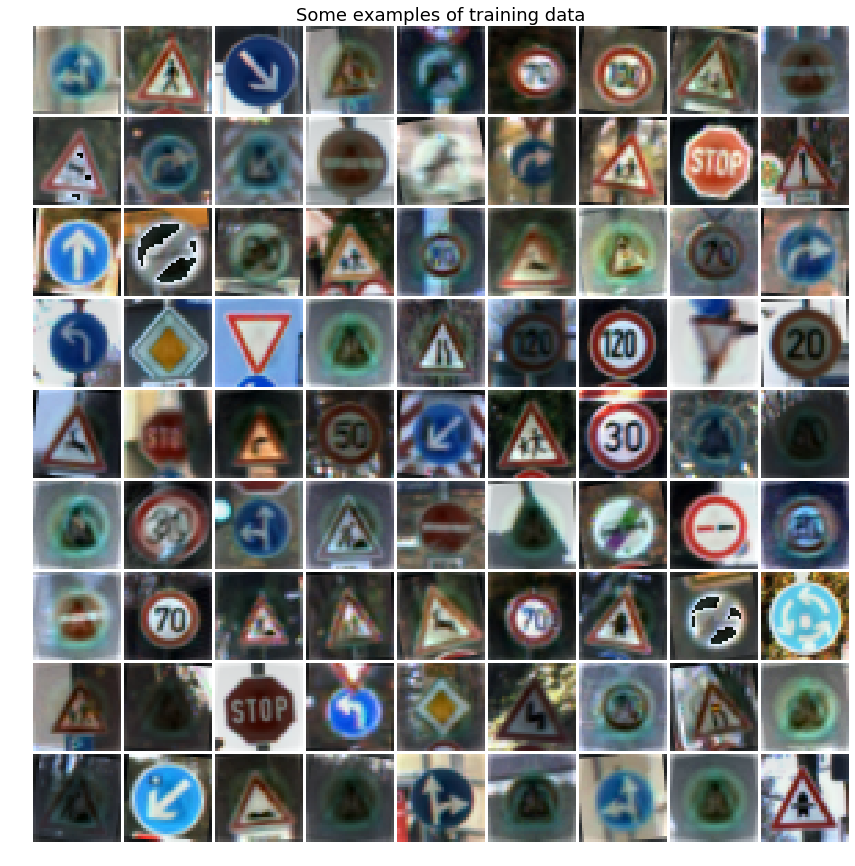


# Import required libraries

In [35]:
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# Store data,labels in list

In [36]:
classes= 43
data = []
labels = []

cur_path = os.getcwd()#to get current directory

classs = { 1:"Speed limit (20km/h)",
    2:"Speed limit (30km/h)",
    3:"Speed limit (50km/h)",
    4:"Speed limit (60km/h)",
    5:"Speed limit (70km/h)",
    6:"Speed limit (80km/h)",
    7:"End of speed limit (80km/h)",
    8:"Speed limit (100km/h)",
    9:"Speed limit (120km/h)",
    10:"No passing",
    11:"No passing veh over 3.5 tons",
    12:"Right-of-way at intersection",
    13:"Priority road",
    14:"Yield",
    15:"Stop",
    16:"No vehicles",
    17:"Veh > 3.5 tons prohibited",
    18:"No entry",
    19:"General caution",
    20:"Dangerous curve left",
    21:"Dangerous curve right",
    22:"Double curve",
    23:"Bumpy road",
    24:"Slippery road",
    25:"Road narrows on the right",
    26:"Road work",
    27:"Traffic signals",
    28:"Pedestrians",
    29:"Children crossing",
    30:"Bicycles crossing",
    31:"Beware of ice/snow",
    32:"Wild animals crossing",
    33:"End speed + passing limits",
    34:"Turn right ahead",
    35:"Turn left ahead",
    36:"Ahead only",
    37:"Go straight or right",
    38:"Go straight or left",
    39:"Keep right",
    40:"Keep left",
    41:"Roundabout mandatory",
    42:"End of no passing",
    43:"End no passing veh > 3.5 tons" }


print('Obtaining Images & its labels.....')



Obtaining Images & its labels.....


# Preprocess the images

In [37]:
for i in range(classes):
    path = os.path.join(cur_path,'C:\\AI(ml&dl)\\DATASETS\\Taffic_signals_rec\\code\\dataset\\Train',str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path+'//'+a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
            a = ('{0} loaded'.format(a))
        except:
            print("Load Image Error")
            
print('Dataset Loaded')

Dataset Loaded


# Converting lists into numpy arrays

In [38]:
data = np.array(data)
labels = np.array(labels)

print('data_shape',data.shape,'labels_shape',labels.shape)

X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size = 0.2,random_state = 42)
print('X_train',X_train.shape,
     'X_test',X_test.shape,
     'y_train',y_train.shape,
     'y_test',y_test.shape)



data_shape (38883, 30, 30, 3) labels_shape (38883,)
X_train (31106, 30, 30, 3) X_test (7777, 30, 30, 3) y_train (31106,) y_test (7777,)


# One hot encoding this labels

In [39]:
y_train = to_categorical(y_train,43)
y_test =  to_categorical(y_test,43)

print('y_train_shape',y_train.shape)
print('y_test_shape',y_test.shape)

y_train_shape (31106, 43)
y_test_shape (7777, 43)


# 🏗️ Building set of models of CNN with Keras

In [40]:
model = Sequential()
model.add(Conv2D(32,(5,5),activation='relu',input_shape=X_train.shape[1:]))
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])



# 💡 Training set of models of CNN with Keras

In [50]:
history = model.fit(X_train,y_train,batch_size=32,epochs = 2,validation_data = (X_test,y_test))
print('Initialized model')

Epoch 1/2
973/973 [==============================] - 114s 117ms/step - loss: 0.2105 - accuracy: 0.9475 - val_loss: 0.0640 - val_accuracy: 0.9837
Epoch 2/2
973/973 [==============================] - 114s 117ms/step - loss: 0.2256 - accuracy: 0.9446 - val_loss: 0.0423 - val_accuracy: 0.9886
Initialized model


# 📈 Plotting comparison results for accuracy

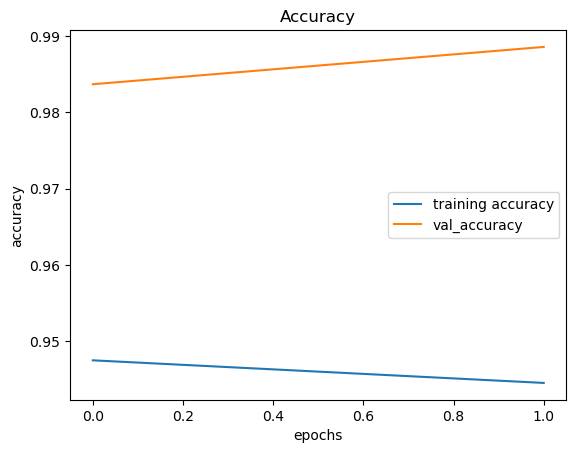

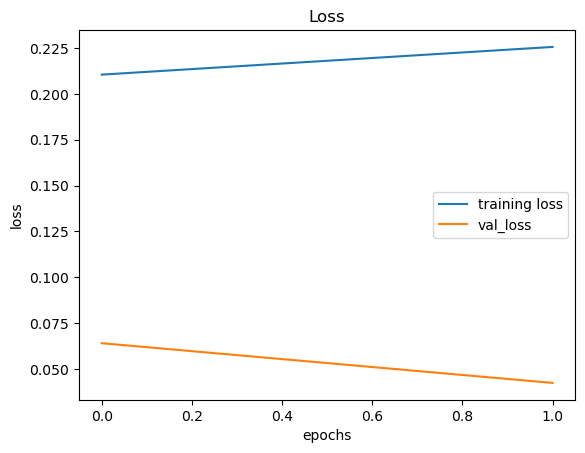

In [56]:
plt.figure(0)
plt.plot(history.history['accuracy'],label = 'training accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('Accuracy.png')

plt.figure(1)
plt.plot(history.history['loss'],label = 'training loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('Loss.png')


In [57]:
label = list(classs.items())
print(label)

[(1, 'Speed limit (20km/h)'), (2, 'Speed limit (30km/h)'), (3, 'Speed limit (50km/h)'), (4, 'Speed limit (60km/h)'), (5, 'Speed limit (70km/h)'), (6, 'Speed limit (80km/h)'), (7, 'End of speed limit (80km/h)'), (8, 'Speed limit (100km/h)'), (9, 'Speed limit (120km/h)'), (10, 'No passing'), (11, 'No passing veh over 3.5 tons'), (12, 'Right-of-way at intersection'), (13, 'Priority road'), (14, 'Yield'), (15, 'Stop'), (16, 'No vehicles'), (17, 'Veh > 3.5 tons prohibited'), (18, 'No entry'), (19, 'General caution'), (20, 'Dangerous curve left'), (21, 'Dangerous curve right'), (22, 'Double curve'), (23, 'Bumpy road'), (24, 'Slippery road'), (25, 'Road narrows on the right'), (26, 'Road work'), (27, 'Traffic signals'), (28, 'Pedestrians'), (29, 'Children crossing'), (30, 'Bicycles crossing'), (31, 'Beware of ice/snow'), (32, 'Wild animals crossing'), (33, 'End speed + passing limits'), (34, 'Turn right ahead'), (35, 'Turn left ahead'), (36, 'Ahead only'), (37, 'Go straight or right'), (38, '

# LEt's do testing on Test data

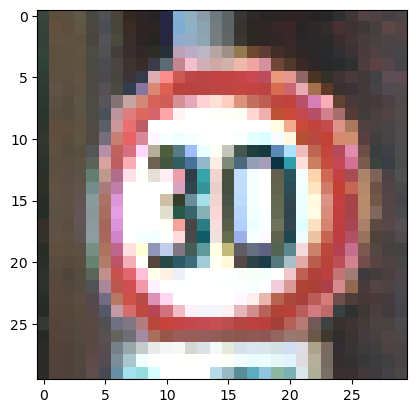

1/1 [==============================] - 0s 53ms/step
[[2.6534584e-31 1.0000000e+00 1.2816159e-18 6.4094473e-37 1.9399713e-24
  2.6919228e-18 6.4236507e-35 2.5353112e-31 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]
1.0
1
(2, 'Speed limit (30km/h)')


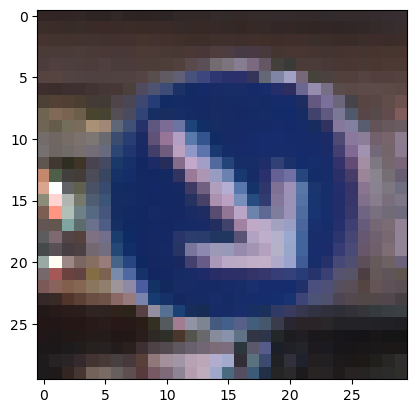

1/1 [==============================] - 0s 26ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
1.0
38
(39, 'Keep right')


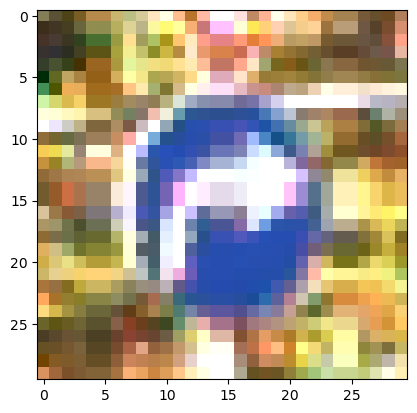

1/1 [==============================] - 0s 47ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  2.7644195e-22 0.0000000e+00 0.0000000e+00 0.0000000e+00 4.9715228e-36
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]
1.0
33
(34, 'Turn right ahead')


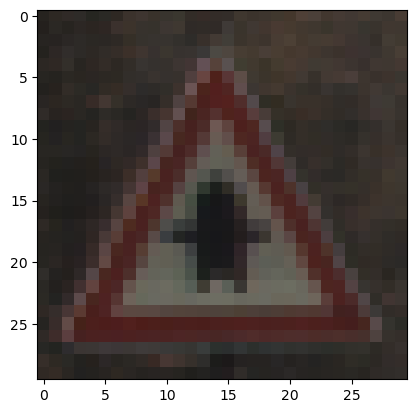

1/1 [==============================] - 0s 43ms/step
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.13786424e-38
  0.00000000e+00 1.79378647e-28 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  2.59670205e-31 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.08022026e-35 0.00000000e+00
  1.51584864e-34 2.46414786e-26 0.00000000e+00 1.55824636e-31
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.82355414e-24
  3.32434394e-35 1.68544664e-36 3.58176431e-16 6.53634598e-34
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.96747107e-34 0.00000000e+00
  3.65491435e-25 0.00000000e+00 0.00000000e+00]]
1.0
11
(12, 'Right-of-way at intersection')


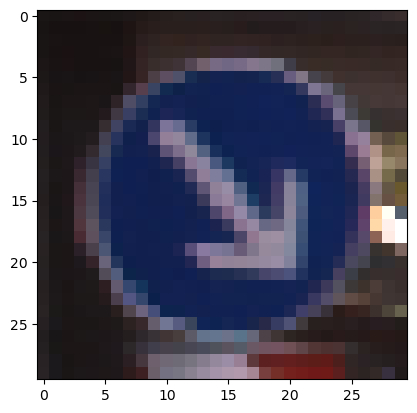

1/1 [==============================] - 0s 41ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
1.0
38
(39, 'Keep right')


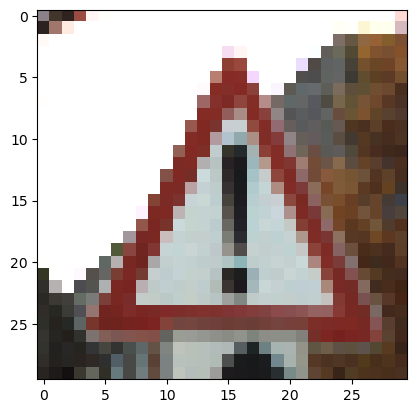

1/1 [==============================] - 0s 41ms/step
[[1.3502440e-30 1.8191157e-15 9.5131753e-23 4.6897718e-29 4.5482315e-18
  2.4863707e-22 6.5678455e-32 1.0079951e-26 3.7159214e-36 1.4275186e-38
  6.8150451e-29 1.3650486e-18 2.2727539e-21 3.4907868e-20 6.2825725e-31
  1.0616663e-18 4.5510407e-34 1.2685613e-32 1.0000000e+00 1.1885472e-33
  3.6254635e-24 7.6243896e-24 2.3914660e-22 1.1857459e-30 1.9773123e-10
  1.8214141e-15 1.7990854e-11 2.2635787e-13 1.6863446e-24 2.9821569e-24
  7.6730084e-29 1.9817113e-21 1.6379219e-28 8.3677865e-23 9.4025198e-31
  2.2085333e-21 3.0364436e-23 2.2654777e-18 1.8463548e-21 5.2553137e-17
  2.6205694e-20 2.3049204e-35 0.0000000e+00]]
1.0
18
(19, 'General caution')


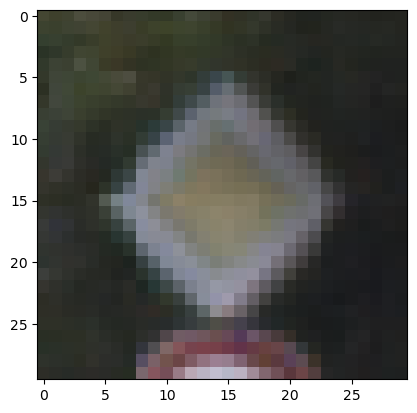

1/1 [==============================] - 0s 34ms/step
[[1.3483811e-37 2.7303127e-25 3.0756087e-26 3.4174957e-31 6.7587540e-31
  5.4720808e-27 2.0117682e-35 2.3906559e-28 9.1044179e-29 8.3882151e-29
  1.6867420e-33 1.0291322e-32 1.0000000e+00 8.5525331e-25 2.2289483e-28
  1.2004540e-25 4.0826297e-24 3.8067284e-28 1.5353509e-33 0.0000000e+00
  3.7489573e-34 3.6060449e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.4332707e-29 7.9173265e-30 0.0000000e+00 0.0000000e+00 1.3355946e-35
  0.0000000e+00 0.0000000e+00 3.6342665e-26 2.0883747e-36 2.0837204e-35
  4.3142321e-27 0.0000000e+00 0.0000000e+00 4.1732841e-30 0.0000000e+00
  1.1556309e-21 4.8741213e-35 2.7164491e-36]]
1.0
12
(13, 'Priority road')


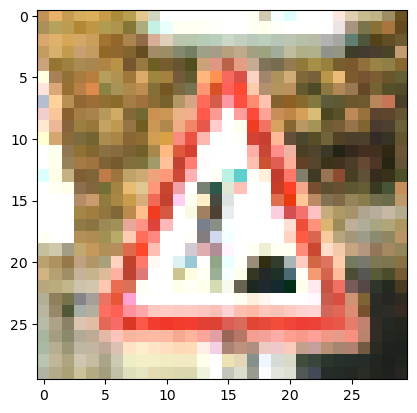

1/1 [==============================] - 0s 38ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
25
(26, 'Road work')


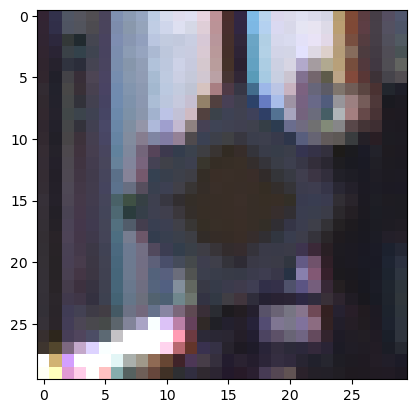

1/1 [==============================] - 0s 35ms/step
[[4.5573684e-12 3.6271576e-06 1.7694028e-07 3.0661170e-08 3.3052708e-10
  5.6827671e-06 5.0281244e-05 3.2313693e-08 1.8987908e-08 3.1186423e-10
  4.3024989e-10 2.4634005e-06 9.9987531e-01 5.3259196e-08 1.3745143e-09
  5.3036384e-08 7.0586554e-09 4.0214485e-09 1.1250241e-08 1.1100064e-11
  5.1941718e-10 1.8027546e-09 2.1945523e-14 1.3107190e-11 4.4155187e-12
  3.7698436e-07 1.2379008e-10 3.5142157e-11 2.7065879e-11 2.6784481e-09
  1.3180860e-09 5.1118213e-13 1.3896984e-07 3.1980085e-11 5.5250716e-08
  1.4518028e-07 8.5143643e-09 3.1320634e-12 2.2000106e-07 3.1456777e-12
  6.1214130e-05 4.1892045e-09 1.2963652e-08]]
0.9998753
12
(13, 'Priority road')


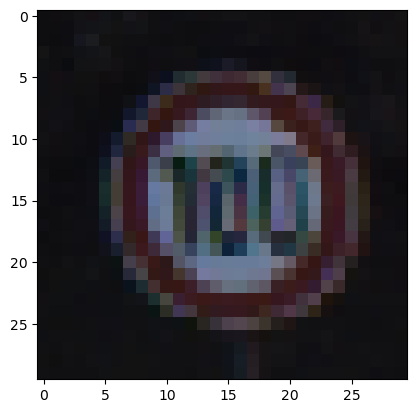

1/1 [==============================] - 0s 32ms/step
[[0.00000000e+00 1.05571532e-22 4.78847603e-29 0.00000000e+00
  1.61812658e-24 1.10230665e-14 0.00000000e+00 1.00000000e+00
  3.04447754e-18 0.00000000e+00 5.30640743e-37 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.23780510e-32
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.78720620e-27 0.00000000e+00 0.00000000e+00]]
1.0
7
(8, 'Speed limit (100km/h)')


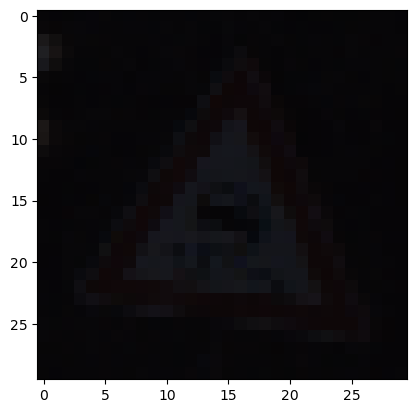

1/1 [==============================] - 0s 47ms/step
[[6.1398984e-09 1.3284937e-07 1.1831817e-06 3.1028865e-04 9.5579356e-10
  3.7934042e-05 4.6039403e-10 1.7829178e-09 8.7756156e-08 2.0081828e-08
  3.6045243e-05 5.1231991e-04 6.9146949e-10 3.4526707e-08 1.3243683e-09
  3.3197056e-11 3.6928292e-13 3.2699063e-09 5.8497380e-07 4.7271627e-05
  1.7082435e-05 2.5586965e-03 2.7645822e-06 4.1195888e-02 2.0056343e-07
  3.2079490e-05 3.1412110e-08 1.1171380e-08 2.2734446e-07 2.6227788e-03
  6.9726451e-04 9.5191360e-01 1.8567597e-11 1.1643744e-09 3.5795409e-09
  8.0124751e-09 3.6142964e-09 9.7304465e-12 1.3337708e-05 7.4978219e-09
  6.4337890e-08 4.4217700e-13 1.6720337e-12]]
0.9519136
31
(32, 'Wild animals crossing')


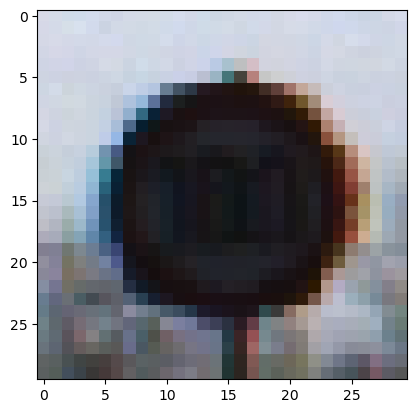

1/1 [==============================] - 0s 46ms/step
[[4.12485797e-08 1.13102689e-03 1.23741802e-05 1.01520186e-06
  2.26329151e-03 2.75595207e-02 5.06887700e-05 9.68362510e-01
  6.07646303e-04 1.14794014e-12 8.70087320e-07 2.90920066e-11
  1.40312665e-07 1.62304370e-09 4.34619229e-09 8.51213917e-06
  1.39748424e-09 1.52844398e-13 3.11375759e-10 3.71869963e-17
  8.23192556e-12 2.88531304e-14 4.19822934e-16 1.63596738e-16
  1.77350051e-12 1.04650913e-10 5.65890173e-12 4.04791752e-15
  9.35274299e-15 1.24317147e-12 3.43761738e-12 4.97238795e-12
  8.21070678e-09 8.22902280e-08 2.77492791e-13 6.25454827e-11
  5.69094535e-14 1.51048878e-11 5.56955926e-10 1.04086358e-10
  1.92850348e-06 2.48358679e-15 1.08852284e-07]]
0.9683625
7
(8, 'Speed limit (100km/h)')


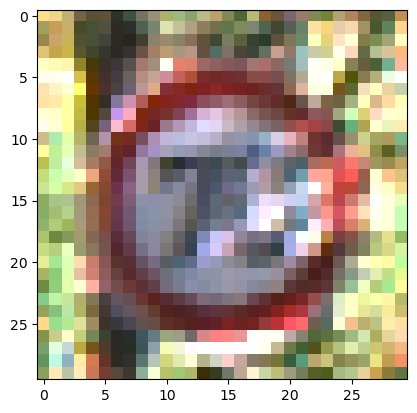

1/1 [==============================] - 0s 47ms/step
[[2.2658754e-12 6.9447684e-01 1.4159077e-09 5.0551550e-14 3.0540276e-01
  3.7031850e-08 1.2043633e-04 7.1600657e-13 3.2339412e-18 4.5624688e-25
  6.6835764e-19 3.9207542e-23 5.2717865e-12 2.5896982e-14 2.3232990e-11
  3.6327974e-09 3.4974125e-21 7.7262567e-24 9.6930331e-18 1.9072715e-28
  2.3614941e-25 4.3657168e-30 1.0980077e-26 3.4360033e-34 1.1112979e-19
  8.1729329e-10 3.7291269e-23 5.2396380e-27 3.8473936e-26 1.0462234e-28
  9.0078994e-30 1.1905427e-29 2.5140536e-12 1.5161572e-18 6.2836404e-21
  3.4114152e-24 1.2255000e-19 9.9690306e-26 1.1464918e-18 2.7039610e-22
  8.4762805e-17 1.9787255e-17 4.4920024e-20]]
0.69447684
1
(2, 'Speed limit (30km/h)')


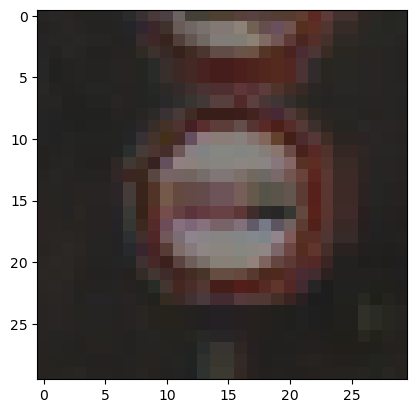

1/1 [==============================] - 0s 51ms/step
[[2.3010809e-20 5.6600923e-15 8.3635952e-14 4.2674073e-10 1.5216559e-16
  1.6005889e-14 6.3782238e-23 6.5825432e-17 1.5239869e-14 9.9999988e-01
  7.3719924e-08 2.1192729e-20 1.9797676e-15 4.8139541e-13 2.0582880e-14
  3.6748483e-11 3.4235963e-08 3.9495452e-14 5.2703567e-22 3.0825054e-17
  2.2911429e-17 1.3996461e-23 1.5913755e-24 6.9827257e-15 2.4433373e-28
  1.7162789e-20 1.0099037e-19 9.4788502e-27 4.3550164e-23 2.1899361e-19
  4.1313390e-23 6.2336404e-21 4.4696084e-19 3.7401775e-16 8.4514475e-16
  2.7410793e-12 4.4288051e-20 2.3441372e-22 2.6330787e-17 3.5758263e-23
  3.8175540e-17 2.9045705e-12 1.6670860e-16]]
0.9999999
9
(10, 'No passing')


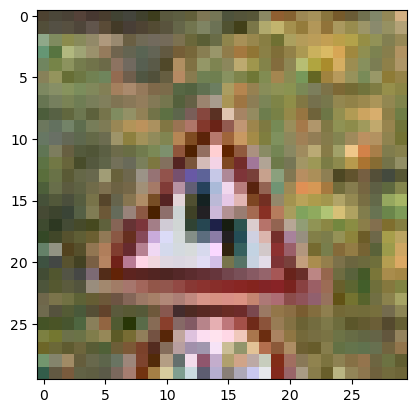

1/1 [==============================] - 0s 46ms/step
[[1.71761161e-10 8.31482723e-08 9.53002382e-06 6.50095387e-07
  2.55786332e-13 4.57320071e-10 1.19431406e-20 2.35018270e-14
  4.64274647e-10 5.91450920e-16 1.77158418e-13 4.60291716e-07
  1.42496948e-09 7.90262161e-11 2.13202478e-09 5.34276302e-16
  2.77015549e-20 1.31303361e-13 2.06545087e-10 2.50811238e-09
  4.17079420e-08 8.08892250e-02 3.27356098e-09 9.84017106e-07
  2.66486995e-06 6.22117586e-05 6.77322154e-09 1.31933200e-10
  1.52578571e-06 1.13869912e-03 2.06215532e-07 9.17893529e-01
  4.41462612e-18 1.72683943e-13 5.45007256e-16 3.00574930e-12
  2.41189786e-14 2.72111515e-15 1.81923483e-07 2.14561442e-12
  3.34750803e-11 6.61911287e-23 1.00130235e-22]]
0.9178935
31
(32, 'Wild animals crossing')


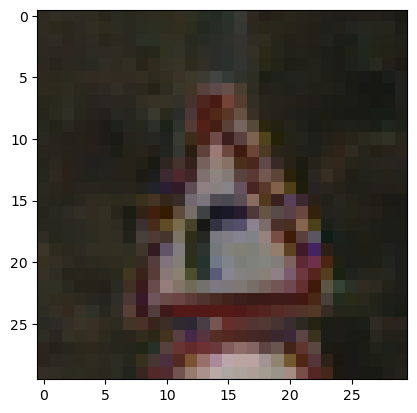

1/1 [==============================] - 0s 50ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00 0.0000000e+00 0.0000000e+00 3.5259159e-21 5.3289822e-38
  1.7749955e-25 8.9030866e-29 0.0000000e+00 8.9290564e-25 0.0000000e+00
  1.8543275e-32 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 4.0797930e-33 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]
1.0
20
(21, 'Dangerous curve right')


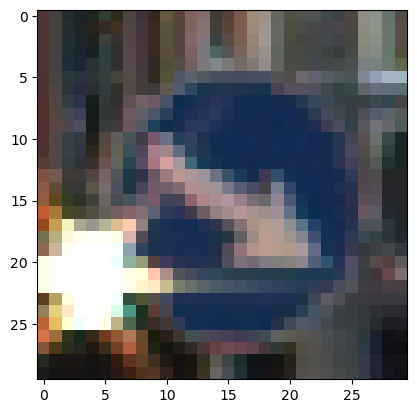

1/1 [==============================] - 0s 53ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
1.0
38
(39, 'Keep right')


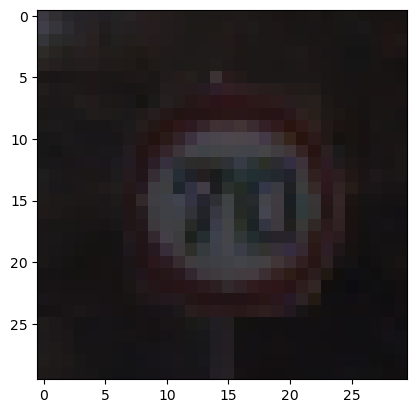

1/1 [==============================] - 0s 49ms/step
[[1.00957680e-11 1.60963154e-08 1.08264846e-08 8.29227569e-14
  1.00000000e+00 1.31779787e-09 2.82846635e-21 3.59693109e-11
  2.56653347e-08 4.90490945e-15 4.10778210e-16 6.52310660e-23
  2.28295139e-13 1.32157722e-11 3.22442615e-12 8.04186318e-09
  1.27677215e-15 2.76372643e-20 6.18425599e-14 9.55356178e-19
  2.21546726e-23 9.99768616e-21 1.00219482e-17 5.13074224e-22
  2.23878397e-19 2.50998213e-17 2.67796072e-12 4.66703175e-23
  1.24346037e-25 4.87170477e-20 5.01631334e-27 4.47644702e-21
  2.20217554e-19 1.14335717e-14 1.22503835e-23 7.31195970e-19
  9.37810656e-20 6.86350270e-19 1.29091957e-17 4.16847479e-17
  3.62025066e-18 1.62737953e-26 1.50024766e-26]]
1.0
4
(5, 'Speed limit (70km/h)')


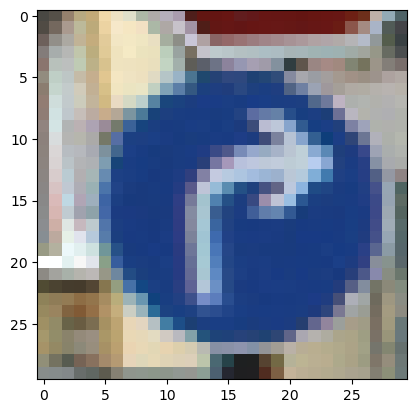

1/1 [==============================] - 0s 34ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  3.4833492e-21 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6234881e-38
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]
1.0
33
(34, 'Turn right ahead')


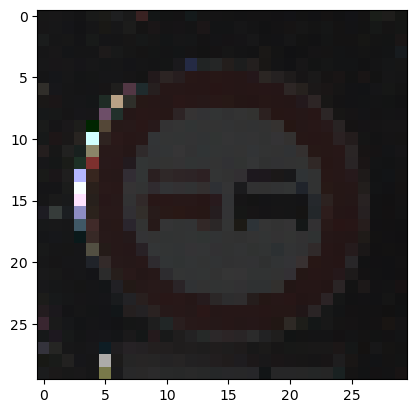

1/1 [==============================] - 0s 44ms/step
[[1.5922430e-15 6.1144000e-11 2.7299862e-10 4.4321304e-08 5.7381110e-11
  3.3383719e-11 8.1734344e-16 1.1999750e-12 8.1726405e-12 9.9895775e-01
  1.0296989e-03 4.0595092e-12 7.7290698e-09 2.3707734e-09 5.0943815e-11
  8.2821507e-06 3.6572526e-06 9.8787256e-10 2.9440380e-13 1.2391030e-09
  2.7934453e-11 1.1960806e-13 4.3314168e-16 5.5516139e-08 1.7330417e-18
  2.1616179e-12 8.6683594e-12 6.1937082e-16 1.3847367e-16 2.7380321e-14
  1.4102449e-16 2.6018499e-12 2.5411406e-13 2.9566480e-10 9.8813215e-11
  6.8156383e-09 2.6997430e-12 1.3945359e-12 2.8732161e-11 1.4004978e-13
  1.3248072e-09 4.9121741e-07 1.0417489e-09]]
0.99895775
9
(10, 'No passing')


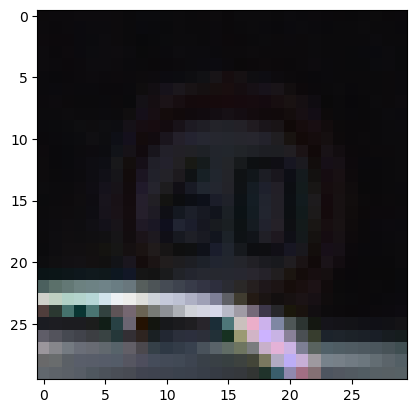

1/1 [==============================] - 0s 45ms/step
[[1.31458744e-17 3.07350256e-09 2.30479549e-04 9.99712646e-01
  3.79947825e-16 5.68918695e-05 1.75690202e-14 2.00638388e-14
  9.06980220e-12 2.27205472e-12 3.50429151e-16 4.96461151e-16
  6.95444440e-12 5.38066779e-11 2.68944091e-14 4.61058275e-13
  1.77685523e-11 4.97749633e-20 2.64116715e-22 3.31858384e-22
  1.62903993e-21 1.11756185e-19 2.10656923e-26 1.86098977e-21
  1.08288435e-27 1.91679668e-17 4.94759770e-23 2.30732309e-24
  2.27287357e-20 4.31418497e-16 6.60017306e-21 1.31767959e-18
  2.14925490e-13 4.69219460e-16 2.06573841e-18 3.05664036e-14
  1.31975142e-19 3.24214775e-26 2.21570139e-15 2.53660496e-23
  1.74515437e-12 5.77915939e-18 8.65108994e-18]]
0.99971265
3
(4, 'Speed limit (60km/h)')


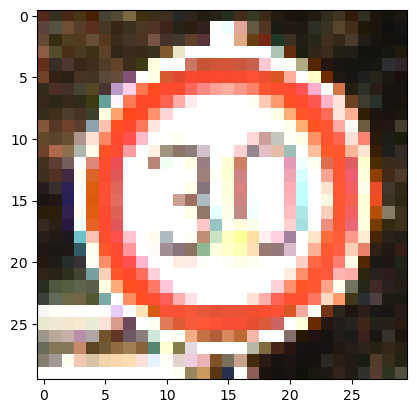

1/1 [==============================] - 0s 36ms/step
[[9.75509103e-24 1.00000000e+00 2.87685921e-20 0.00000000e+00
  1.46550949e-21 2.31315908e-25 0.00000000e+00 1.10018185e-35
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]]
1.0
1
(2, 'Speed limit (30km/h)')


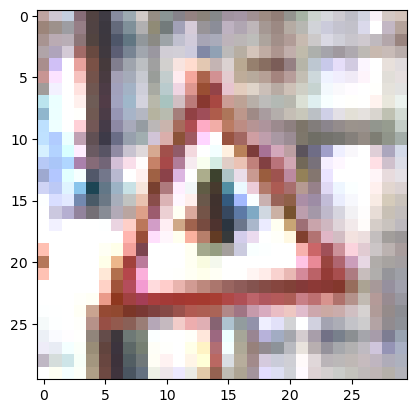

1/1 [==============================] - 0s 52ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 2.9742736e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.3815922e-26 0.0000000e+00 0.0000000e+00
  1.5481817e-21 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  3.8977336e-34 0.0000000e+00 0.0000000e+00]]
1.0
11
(12, 'Right-of-way at intersection')


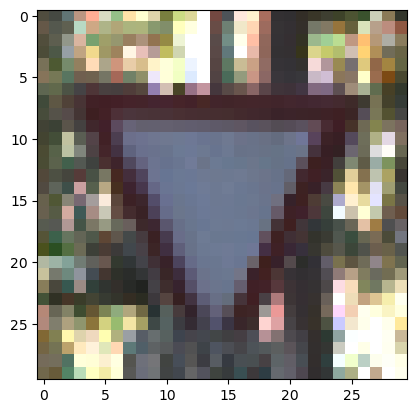

1/1 [==============================] - 0s 49ms/step
[[5.2602937e-32 7.1510630e-20 1.2865409e-17 8.1381415e-24 7.2611529e-13
  7.1751339e-28 0.0000000e+00 1.4819917e-32 8.1159901e-28 2.6294768e-26
  7.5055745e-36 0.0000000e+00 2.6946419e-23 9.9982578e-01 2.1889273e-20
  1.7421163e-04 6.7384692e-33 6.0678460e-28 6.3640954e-28 0.0000000e+00
  0.0000000e+00 4.9674887e-37 1.6438499e-30 2.1871962e-38 0.0000000e+00
  2.3119927e-29 3.1453897e-27 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 4.6494794e-31 5.2967334e-27 6.1119914e-26
  1.4466031e-30 5.7983281e-30 1.5554455e-38 2.6084619e-22 3.8448717e-26
  2.7285945e-35 4.7332325e-38 0.0000000e+00]]
0.9998258
13
(14, 'Yield')


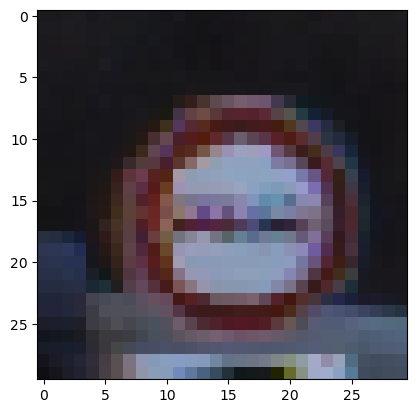

1/1 [==============================] - 0s 40ms/step
[[1.4813374e-28 5.3594656e-21 4.2382903e-16 8.3467474e-15 2.0554230e-23
  7.7279493e-19 7.1722641e-32 2.2165228e-24 8.1633255e-22 1.0000000e+00
  6.1705099e-09 5.9688644e-29 1.7154748e-19 2.4935432e-21 3.5551972e-21
  4.2626417e-17 4.6518072e-12 3.0661748e-21 3.5312127e-32 1.4919795e-24
  1.1204582e-25 1.5323166e-30 3.9625380e-37 1.4260356e-19 0.0000000e+00
  2.8400913e-27 3.9159407e-29 1.5394296e-37 5.0809613e-36 1.3890056e-27
  1.9980932e-35 6.0839033e-27 5.4692787e-29 2.2577086e-22 3.8060393e-24
  6.3143465e-20 4.4305113e-28 1.9863567e-30 2.2005661e-24 3.9712280e-35
  1.7180469e-21 1.7576306e-19 4.2357398e-22]]
1.0
9
(10, 'No passing')


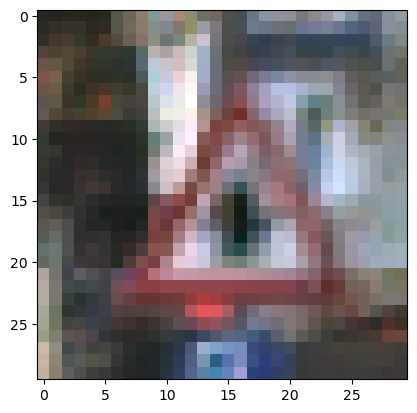

1/1 [==============================] - 0s 49ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.9739862e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.6067060e-31 0.0000000e+00 0.0000000e+00
  1.7813372e-18 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  2.6126820e-29 0.0000000e+00 0.0000000e+00]]
1.0
11
(12, 'Right-of-way at intersection')


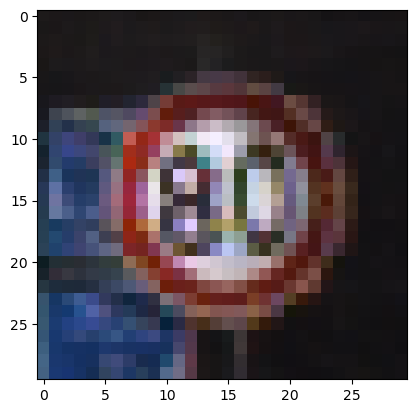

1/1 [==============================] - 0s 45ms/step
[[3.8067998e-36 2.5731672e-14 2.7661988e-17 1.7272699e-17 5.9046131e-30
  1.0000000e+00 1.6206490e-14 9.4978271e-25 5.5351972e-32 0.0000000e+00
  6.7094207e-27 8.7765017e-36 0.0000000e+00 0.0000000e+00 3.5802371e-37
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0679367e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.4157201e-35]]
1.0
5
(6, 'Speed limit (80km/h)')


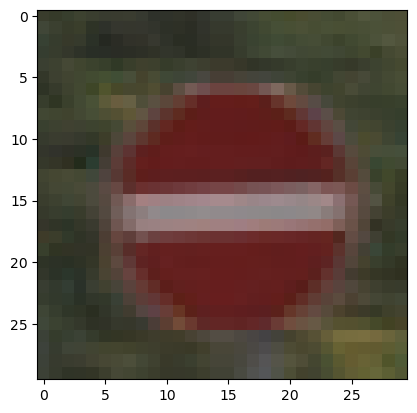

1/1 [==============================] - 0s 34ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 3.2717170e-36 0.0000000e+00 1.2190223e-27
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.3671839e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]
1.0
17
(18, 'No entry')


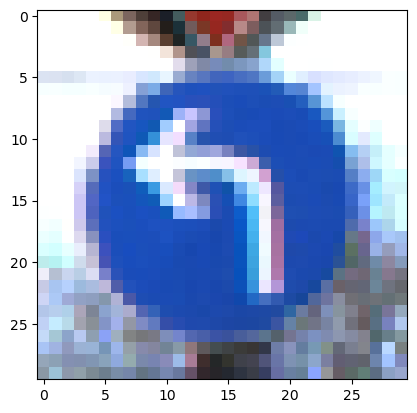

1/1 [==============================] - 0s 41ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.2011060e-30 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  6.3301770e-32 0.0000000e+00 0.0000000e+00 1.0347602e-27 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]
1.0
34
(35, 'Turn left ahead')


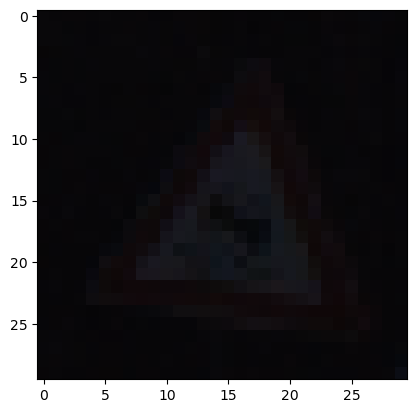

1/1 [==============================] - 0s 41ms/step
[[1.00535147e-09 1.15281381e-07 6.85823352e-07 5.29235440e-05
  2.45001885e-09 9.08864331e-06 1.07197397e-10 7.06751657e-10
  1.74979871e-08 6.18392537e-09 4.28424028e-05 3.37265665e-05
  5.23282417e-10 1.36804159e-08 1.24008555e-08 5.49055315e-11
  1.87426409e-13 3.02607339e-09 8.49739365e-07 1.40379881e-04
  3.30686817e-05 3.58688040e-03 6.90459201e-05 4.03549112e-02
  1.18712410e-06 6.26021065e-04 1.14909284e-07 5.64102987e-09
  5.65931373e-07 3.12526291e-03 1.68652929e-04 9.51732159e-01
  8.44111673e-12 2.39329623e-09 1.59933167e-09 1.82086346e-08
  5.42282574e-09 5.50896308e-11 2.14464380e-05 1.13691643e-08
  3.84926508e-08 5.16192449e-14 1.39364063e-12]]
0.95173216
31
(32, 'Wild animals crossing')


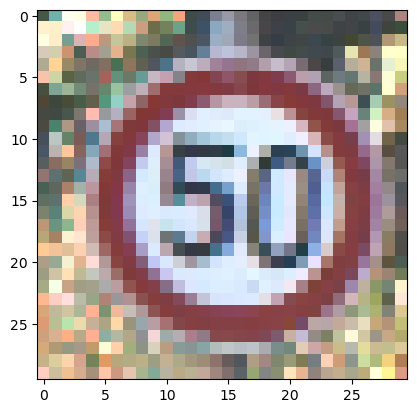

1/1 [==============================] - 0s 49ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
2
(3, 'Speed limit (50km/h)')


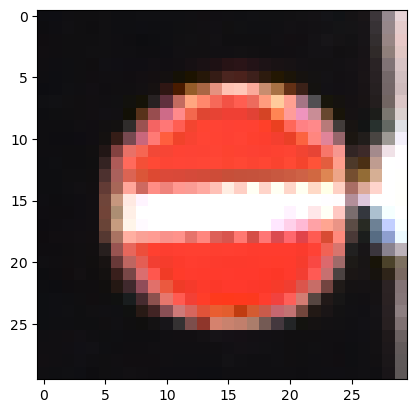

1/1 [==============================] - 0s 45ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1.0
17
(18, 'No entry')


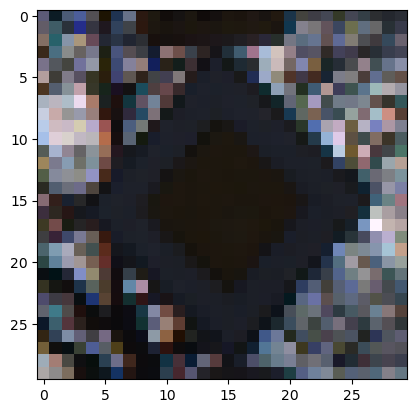

1/1 [==============================] - 0s 44ms/step
[[2.6741359e-10 1.5477098e-06 1.2743722e-06 9.8867122e-07 6.2281900e-09
  8.2778485e-07 7.6100909e-10 1.8361723e-08 1.3463975e-07 4.4734904e-08
  2.2036830e-09 4.1619506e-07 9.9997354e-01 2.1844851e-07 1.0865233e-08
  2.1472557e-08 1.4304298e-08 8.6390443e-08 1.1826718e-08 2.3633129e-10
  2.8046108e-09 5.1071157e-07 1.0310055e-12 8.6827784e-10 4.1203386e-12
  5.1808519e-07 7.5965216e-09 8.7417157e-11 2.3172310e-10 2.7133726e-07
  1.0962211e-09 1.1255356e-09 6.6238823e-09 1.3284322e-10 3.8344114e-10
  3.0325569e-07 2.7509202e-13 5.2034427e-12 6.0778314e-07 5.0157122e-12
  1.8738285e-05 8.8961000e-13 1.0000476e-12]]
0.99997354
12
(13, 'Priority road')


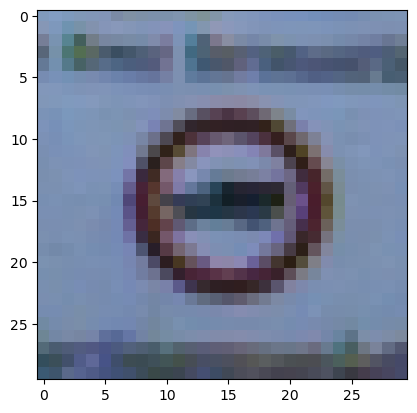

1/1 [==============================] - 0s 33ms/step
[[1.3280922e-11 2.2779693e-06 1.2030838e-06 6.4353588e-07 3.9474131e-08
  3.0422379e-07 7.6729014e-16 5.0487965e-09 1.7799268e-05 5.2929515e-01
  1.0575039e-04 1.1828872e-14 7.9007421e-08 1.7430352e-08 5.8657053e-09
  1.9979951e-05 4.7055656e-01 2.5196095e-10 8.6800421e-15 1.9385045e-12
  4.5978707e-11 1.1261823e-16 1.4644826e-16 3.9755452e-11 8.7508272e-18
  4.3266643e-14 4.7491572e-14 1.2464073e-18 8.5387369e-16 1.2402322e-14
  1.4565101e-16 2.0570500e-13 1.3609537e-12 2.5703153e-09 5.8345095e-12
  5.2905458e-10 2.1083001e-12 6.0185967e-14 1.3826567e-09 5.1816766e-15
  1.6797051e-07 1.9289326e-09 3.8296501e-12]]
0.52929515
9
(10, 'No passing')


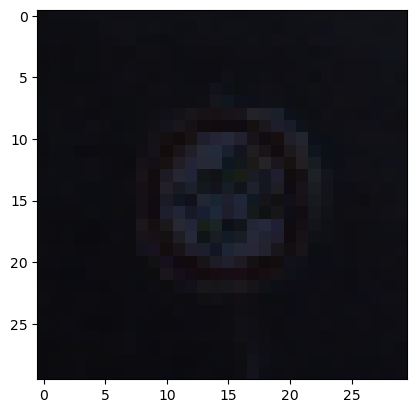

1/1 [==============================] - 0s 39ms/step
[[3.3495936e-04 4.8402343e-03 2.4939638e-03 4.5793406e-03 5.3002061e-03
  3.2541743e-01 4.7694189e-06 8.2052127e-02 5.2723151e-01 8.6586759e-04
  3.5575401e-02 1.8544217e-04 4.9914514e-05 1.4735472e-04 3.9759278e-05
  1.9671312e-05 1.0442892e-03 3.7034712e-04 9.4125653e-06 2.0803814e-04
  4.7291471e-03 1.4707007e-05 3.4715154e-07 1.5713676e-04 2.2140389e-07
  8.9195610e-06 1.0328738e-04 6.7696629e-07 1.6813317e-05 2.7714501e-04
  9.6817745e-04 9.7880699e-04 1.7166346e-07 9.6869095e-05 2.3808770e-06
  1.2454267e-05 1.4029121e-05 4.1337057e-06 5.6893474e-05 6.2896197e-06
  1.7758148e-03 1.3803901e-07 5.2299752e-06]]
0.5272315
8
(9, 'Speed limit (120km/h)')


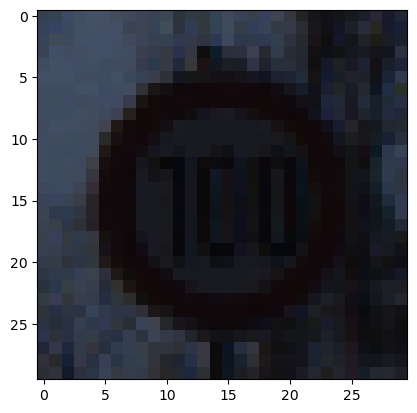

1/1 [==============================] - 0s 38ms/step
[[2.5819724e-14 3.7871917e-08 2.6284369e-10 1.8496799e-12 7.9879607e-07
  4.4730783e-05 1.9577603e-14 9.9970824e-01 2.4608499e-04 5.0775105e-18
  2.4046923e-12 2.7219251e-18 3.2678931e-14 1.0311202e-14 4.6151636e-17
  4.3796924e-11 3.6752093e-13 8.1798663e-21 6.9198879e-17 4.1897916e-27
  1.9383830e-18 5.0435415e-23 2.4383818e-26 6.1656516e-24 1.3433420e-22
  6.0383648e-20 6.2152846e-18 5.5158960e-26 1.5437557e-21 6.7884200e-19
  1.0549863e-19 1.8197540e-19 2.8803705e-18 1.8060165e-15 7.2264689e-23
  7.0867649e-19 2.0540327e-22 1.7751929e-20 2.1079051e-16 2.0139240e-18
  1.1520414e-10 9.5956626e-25 3.1286202e-16]]
0.99970824
7
(8, 'Speed limit (100km/h)')


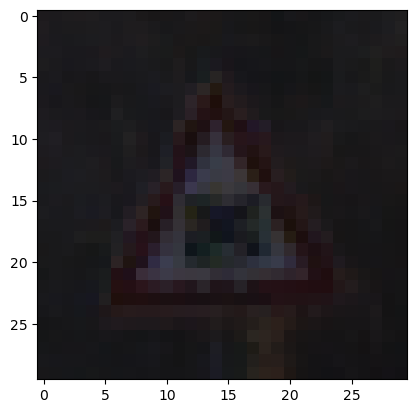

1/1 [==============================] - 0s 41ms/step
[[2.6537796e-15 3.8066208e-13 4.7071548e-12 7.7599323e-11 3.3736284e-18
  7.3184243e-11 1.2443418e-16 5.1998020e-12 1.1786796e-11 2.1482306e-12
  2.1708749e-10 1.5874997e-04 3.9258197e-11 9.9487844e-13 1.2619646e-12
  1.7605378e-14 5.9007472e-17 3.3268557e-13 1.3791953e-13 2.6615292e-12
  1.2962073e-06 3.7994982e-07 2.6193938e-14 1.8903414e-07 9.6684962e-09
  2.4722437e-09 1.1871404e-11 2.9973016e-14 2.2249070e-08 4.9514156e-06
  9.9983442e-01 4.3087800e-09 4.8113695e-16 1.7540831e-13 9.0302078e-11
  4.8910805e-13 1.2839682e-17 6.2705161e-17 5.6932654e-13 8.1902606e-15
  4.9724030e-11 3.3266685e-15 1.6416638e-16]]
0.9998344
30
(31, 'Beware of ice/snow')


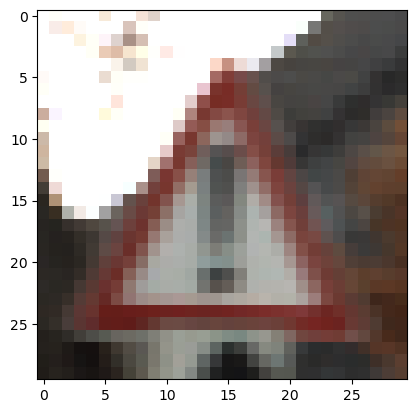

1/1 [==============================] - 0s 62ms/step
[[2.1430083e-38 1.2881088e-20 1.7117139e-29 4.3754488e-38 3.1852415e-21
  7.5997499e-28 0.0000000e+00 9.0745108e-33 0.0000000e+00 0.0000000e+00
  0.0000000e+00 2.4055593e-27 2.0845239e-27 1.2058174e-28 0.0000000e+00
  7.1605938e-24 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  7.1817368e-32 7.9874999e-36 1.7251916e-29 0.0000000e+00 5.9971247e-20
  8.6288982e-23 1.6810895e-14 1.1446268e-22 5.1037061e-37 7.0883733e-34
  0.0000000e+00 6.2693977e-33 0.0000000e+00 2.6541355e-32 1.3151132e-36
  1.1347760e-28 1.2673231e-32 1.2276877e-28 5.8572523e-31 7.5497609e-28
  1.5887876e-29 0.0000000e+00 0.0000000e+00]]
1.0
18
(19, 'General caution')


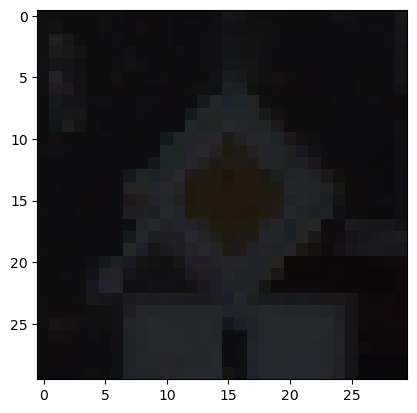

1/1 [==============================] - 0s 48ms/step
[[4.48370326e-16 1.51194399e-08 2.01567235e-10 3.97728793e-14
  1.24078681e-11 2.59162891e-09 1.82432110e-14 1.18762831e-08
  2.00376462e-08 5.10711644e-13 2.84651686e-12 6.59842190e-12
  9.99984384e-01 7.57854890e-11 1.57562413e-13 6.79351297e-10
  1.98136257e-10 4.53400203e-13 1.17912272e-13 2.37269645e-18
  5.19227294e-13 1.62499503e-13 2.18424225e-22 8.10618683e-16
  4.21495605e-17 1.50155192e-12 2.50625963e-13 1.58997299e-17
  9.96643533e-18 2.45909572e-14 1.09177719e-14 4.13199903e-16
  9.85399262e-13 1.59890804e-13 2.60080641e-15 2.22598884e-11
  1.80304449e-16 2.67895461e-13 1.25674965e-11 1.49704264e-15
  1.55666075e-05 3.68467802e-16 2.65764397e-14]]
0.9999844
12
(13, 'Priority road')


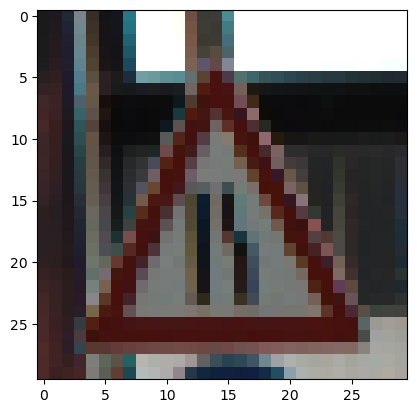

1/1 [==============================] - 0s 40ms/step
[[7.6313083e-17 3.4413316e-11 1.9489126e-12 2.9800064e-16 9.3900446e-15
  1.8314399e-14 3.7828748e-18 9.2841492e-16 1.4894988e-17 4.9959989e-24
  2.7560708e-20 2.5356004e-08 2.9737341e-11 9.2107091e-15 1.3584810e-19
  6.3645382e-15 4.1296357e-23 1.1120372e-21 4.0321805e-08 4.2736318e-12
  1.6287168e-11 2.0351421e-10 1.9354882e-19 1.6078950e-14 9.9999940e-01
  1.0684861e-09 6.6042571e-10 5.3307559e-07 3.6756911e-09 2.1375478e-13
  4.3237983e-10 3.8081327e-14 6.2459451e-13 3.9875828e-16 7.9698013e-16
  1.5588764e-15 3.6997595e-17 2.0716666e-14 1.9713421e-14 1.6919563e-16
  2.5994967e-15 1.5726541e-17 1.9425596e-19]]
0.9999994
24
(25, 'Road narrows on the right')


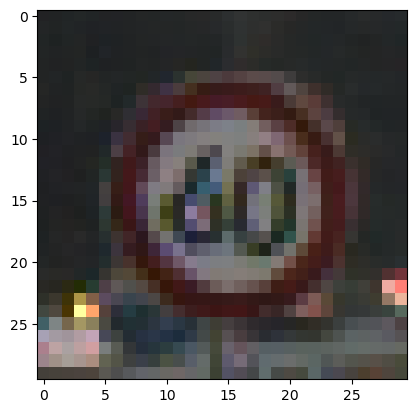

1/1 [==============================] - 0s 45ms/step
[[8.95909864e-36 1.08427275e-23 2.77311133e-15 1.00000000e+00
  0.00000000e+00 2.02961694e-16 7.21762256e-35 0.00000000e+00
  1.12464538e-34 1.51267863e-25 1.26923900e-32 1.41456898e-37
  2.23212395e-34 5.46043931e-29 8.31819534e-32 7.23495625e-29
  2.91412340e-29 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.92934239e-33 0.00000000e+00 0.00000000e+00
  1.09659376e-30 3.29199833e-36 0.00000000e+00 2.15467130e-32
  0.00000000e+00 0.00000000e+00 9.15777413e-38 0.00000000e+00
  6.94873385e-32 0.00000000e+00 0.00000000e+00]]
1.0
3
(4, 'Speed limit (60km/h)')


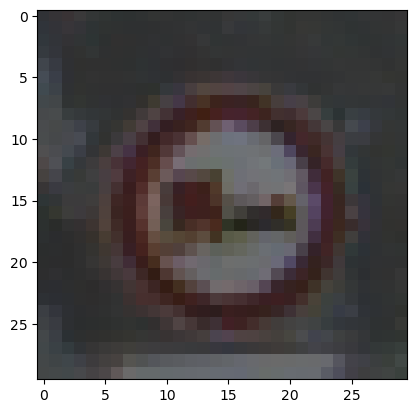

1/1 [==============================] - 0s 47ms/step
[[0.0000000e+00 2.2289228e-28 2.6980244e-29 9.3581676e-27 2.9774289e-31
  2.1117046e-19 4.0578379e-37 9.1775791e-28 3.7675737e-30 7.2765768e-16
  1.0000000e+00 3.0144508e-35 9.0649132e-36 1.4428552e-28 6.7223884e-33
  9.0756187e-33 2.7518415e-33 7.5088380e-34 5.7231290e-35 0.0000000e+00
  1.6899808e-34 0.0000000e+00 0.0000000e+00 7.6193244e-33 0.0000000e+00
  1.7995851e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 2.2373367e-38 0.0000000e+00 7.3471051e-34 3.7190572e-35
  1.9851231e-29 1.8827475e-38 3.3192321e-38 2.8163017e-35 0.0000000e+00
  2.0985466e-38 0.0000000e+00 6.9800085e-23]]
1.0
10
(11, 'No passing veh over 3.5 tons')


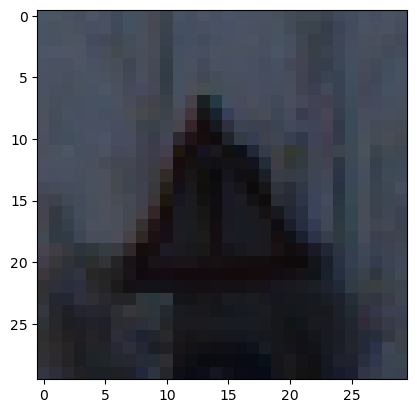

1/1 [==============================] - 0s 43ms/step
[[7.80963092e-05 4.66664042e-03 5.90329757e-04 5.88133335e-05
  4.90915962e-04 5.42879617e-03 9.18427122e-06 2.14221451e-04
  1.92095176e-04 1.98945770e-07 6.38332684e-04 6.90772804e-03
  2.37161657e-04 3.02441531e-05 5.93496188e-05 1.34277525e-05
  3.42535493e-08 4.79771516e-05 3.23900014e-01 7.02432226e-05
  1.48016922e-02 2.37335893e-03 5.33324257e-02 1.31622108e-03
  1.02273636e-02 3.22080329e-02 8.78924131e-02 2.24716459e-05
  3.29636969e-04 5.10145538e-02 9.56153125e-03 3.92857373e-01
  2.33963803e-07 3.05679038e-07 6.52454332e-07 2.17450648e-07
  1.53757946e-06 6.65787775e-06 2.03322088e-05 8.34405091e-06
  3.90771747e-04 8.21941681e-11 4.54490667e-09]]
0.39285737
31
(32, 'Wild animals crossing')


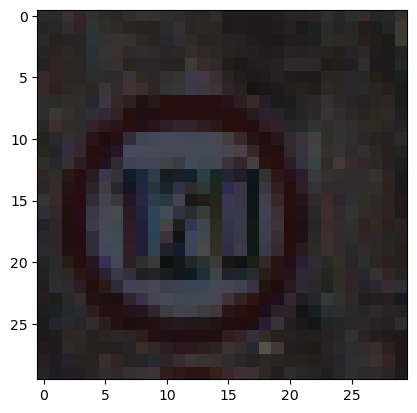

1/1 [==============================] - 0s 34ms/step
[[6.2561683e-02 1.2791668e-01 1.1582017e-03 6.2718791e-06 2.8729278e-01
  7.3094992e-03 9.7459269e-07 8.8949976e-03 4.9720687e-01 4.1898188e-06
  6.2508129e-06 1.1038954e-07 2.4252488e-06 5.6823970e-05 1.1471513e-04
  4.4611177e-05 4.3472678e-06 5.2342801e-07 2.0211036e-04 2.0445579e-08
  3.9647648e-04 3.1165978e-08 1.3266006e-06 1.3537043e-07 1.3649787e-07
  2.4161727e-05 1.0622176e-03 1.8264787e-09 1.8811519e-07 7.9973361e-06
  1.1947737e-06 1.3158306e-07 1.0287034e-05 2.2046456e-06 5.1530051e-06
  2.5174108e-07 4.8432703e-06 2.2532525e-07 5.5330540e-03 9.9041299e-06
  1.5586028e-04 4.3989288e-09 1.7211091e-08]]
0.49720687
8
(9, 'Speed limit (120km/h)')


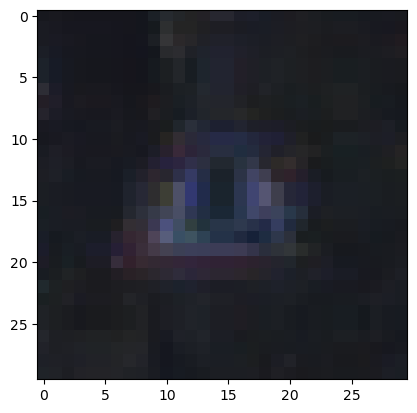

1/1 [==============================] - 0s 47ms/step
[[5.90718446e-05 5.89278638e-01 1.34396613e-01 5.49602846e-05
  1.45087689e-01 9.67053473e-02 1.02520135e-04 1.72246844e-04
  1.10928943e-06 2.43149337e-12 4.26668885e-06 2.31475206e-05
  1.09192541e-07 3.93252867e-06 1.69447878e-06 3.47520063e-06
  1.69670267e-11 7.27251059e-09 1.07613322e-03 9.36618889e-08
  1.66038660e-06 6.24871609e-05 5.87267323e-07 8.55486846e-08
  1.71406625e-03 1.35532711e-02 7.59068780e-06 5.53133191e-07
  2.68719558e-09 3.54364630e-07 1.41256805e-06 1.18144145e-02
  2.14867191e-09 6.02256732e-05 1.13012657e-08 1.59753206e-08
  8.70481571e-08 1.08424611e-04 3.19953006e-06 5.63087501e-03
  6.96833449e-05 2.94355232e-14 5.62365814e-11]]
0.58927864
1
(2, 'Speed limit (30km/h)')


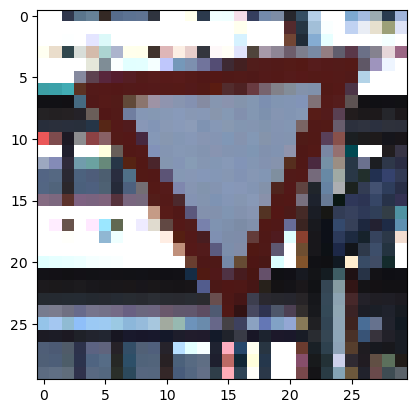

1/1 [==============================] - 0s 41ms/step
[[0.0000000e+00 7.8151830e-30 2.5195266e-25 4.7064905e-30 1.0611491e-31
  1.4439285e-36 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 5.8477745e-35 1.0000000e+00 8.8792773e-29
  2.9555923e-21 0.0000000e+00 0.0000000e+00 3.1455803e-33 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.1569690e-29 0.0000000e+00 0.0000000e+00
  4.9526329e-28 3.5268673e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 7.6691381e-31
  1.6219033e-38 5.9725942e-31 0.0000000e+00 1.1732329e-23 2.4366365e-35
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]
1.0
13
(14, 'Yield')


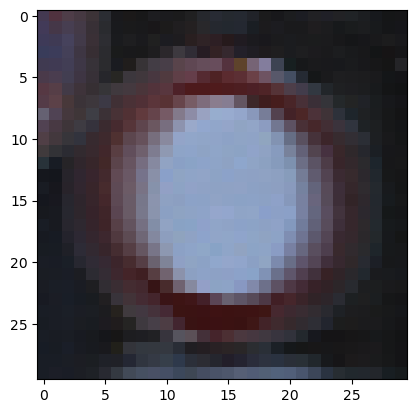

1/1 [==============================] - 0s 62ms/step
[[4.76574187e-17 1.25983055e-08 5.78536641e-09 3.14859305e-10
  3.48665417e-08 5.96131304e-12 3.99410289e-14 7.13012288e-11
  6.56640215e-13 2.15901346e-14 1.66633523e-16 1.97725712e-19
  2.85972690e-10 3.68087314e-07 3.59158883e-11 9.99999523e-01
  2.67569089e-13 6.32903639e-18 1.32249802e-13 1.28324098e-23
  3.81973169e-20 1.35926777e-21 1.11950525e-17 3.12929857e-20
  7.98653668e-17 8.80612841e-17 2.07332998e-15 2.79911780e-22
  5.69675441e-18 2.34680627e-19 1.76674496e-19 1.51550180e-18
  8.69826309e-08 1.48007149e-13 8.81776799e-15 2.94706886e-13
  8.82112764e-16 2.40518496e-17 2.28290910e-11 9.47935307e-12
  7.83158640e-13 1.04637262e-15 2.40652499e-17]]
0.9999995
15
(16, 'No vehicles')


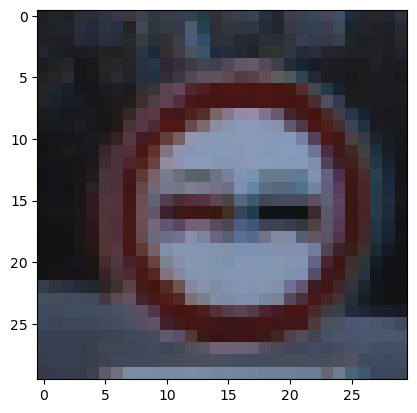

1/1 [==============================] - 0s 46ms/step
[[0.0000000e+00 7.4581455e-32 1.5222491e-30 1.1616369e-22 2.1051207e-31
  7.7051319e-35 0.0000000e+00 2.0993173e-36 2.0265192e-34 1.0000000e+00
  4.9397686e-19 0.0000000e+00 2.1621386e-25 5.1305948e-26 1.8323825e-31
  4.3670269e-16 6.4434199e-16 2.5000942e-30 0.0000000e+00 1.0779713e-30
  1.4832214e-34 0.0000000e+00 0.0000000e+00 2.0769311e-24 0.0000000e+00
  0.0000000e+00 3.7369189e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 4.9609302e-37 5.4041524e-31 1.5195818e-28 1.1214126e-31
  5.5222674e-25 4.4742957e-36 1.2656779e-36 6.5181612e-29 2.1395472e-36
  3.1648446e-29 3.9927868e-18 1.0861348e-32]]
1.0
9
(10, 'No passing')


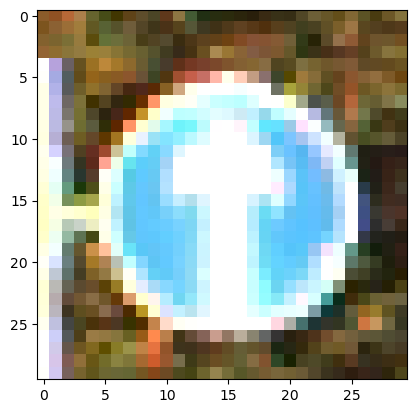

1/1 [==============================] - 0s 38ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.1911010e-31
  0.0000000e+00 0.0000000e+00 6.1536621e-37 3.3177847e-33 0.0000000e+00
  2.1917967e-37 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 8.5578371e-36 9.0164818e-31 7.0730652e-17
  1.0000000e+00 1.9541955e-31 0.0000000e+00 4.7864840e-37 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]
1.0
35
(36, 'Ahead only')


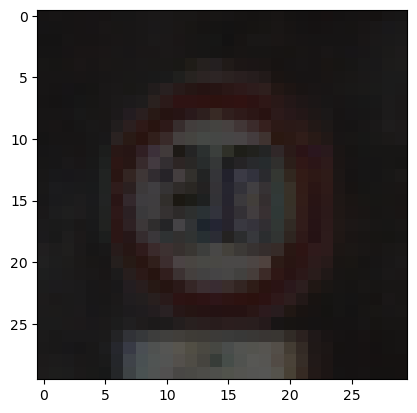

1/1 [==============================] - 0s 66ms/step
[[5.4898718e-13 1.2670968e-05 2.7144753e-05 5.3245924e-07 5.5755521e-08
  9.9995637e-01 1.0076985e-09 3.3202750e-06 7.2240551e-09 1.6507612e-18
  3.2744998e-11 1.8780670e-16 3.0095589e-15 5.1001933e-15 5.7614158e-14
  7.8234623e-15 6.8431948e-14 1.6159344e-16 1.0316900e-16 4.6842561e-22
  8.9862103e-17 3.0484552e-20 6.6991709e-22 6.0310593e-23 1.6859254e-22
  6.3105199e-16 5.3477016e-18 5.5310345e-23 3.2052748e-21 4.4131714e-17
  1.6516054e-18 6.0102435e-18 5.4135050e-18 9.6210454e-14 1.9562637e-18
  1.9326089e-19 2.4496616e-20 6.9224930e-20 2.1397030e-17 1.6973952e-19
  1.4047701e-13 1.5810992e-23 3.8607105e-15]]
0.99995637
5
(6, 'Speed limit (80km/h)')


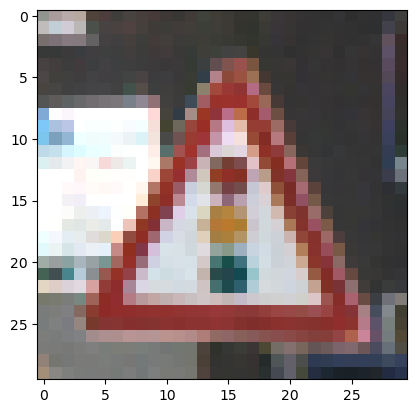

1/1 [==============================] - 0s 34ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.7823043e-31
  3.1149677e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.6981007e-30 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 9.7797915e-17 0.0000000e+00
  5.9579336e-33 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.3249886e-31
  1.5238879e-37 1.0000000e+00 1.8754075e-23 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]
1.0
26
(27, 'Traffic signals')


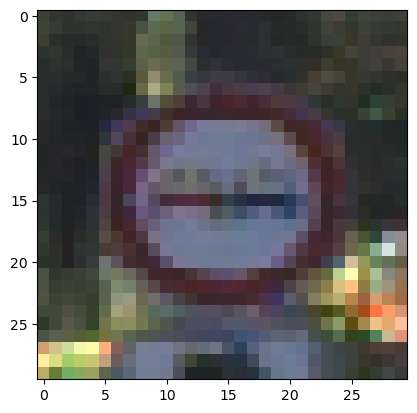

1/1 [==============================] - 0s 58ms/step
[[8.4487625e-26 3.6836896e-19 3.4281597e-18 6.4425909e-14 4.2662793e-20
  3.3682570e-19 1.2244459e-29 1.4289211e-20 4.0915132e-18 1.0000000e+00
  3.8997094e-09 1.5802321e-25 6.3718415e-19 4.5755899e-17 1.0996706e-19
  6.6378232e-15 1.7564555e-10 1.1055681e-18 2.6726638e-27 1.0855403e-21
  2.0116903e-21 2.0232660e-28 6.8367551e-31 6.3030210e-17 5.8743745e-37
  5.1514080e-24 9.7845235e-26 2.7673885e-34 1.5840725e-30 1.6817970e-23
  6.1107590e-30 2.2754473e-25 2.1881426e-25 5.6589721e-22 1.7451096e-20
  3.5409114e-17 9.7939337e-26 2.4059157e-28 5.9705487e-22 1.4156559e-27
  7.4629728e-20 1.6655552e-15 2.4643986e-21]]
1.0
9
(10, 'No passing')


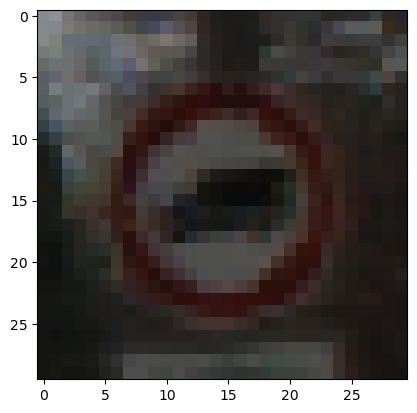

1/1 [==============================] - 0s 41ms/step
[[2.5509104e-16 1.8317910e-13 1.6058484e-14 5.0242610e-12 1.6799624e-16
  9.8373002e-13 1.1551308e-13 6.4552598e-14 1.9209084e-10 2.2019490e-11
  3.3739114e-21 5.6203360e-21 3.9788204e-11 3.5975424e-14 1.2329881e-18
  1.1979595e-12 9.9999988e-01 1.3941777e-17 1.0433939e-18 1.6325082e-27
  2.1882409e-19 1.3552729e-26 6.4690502e-26 2.4704789e-21 1.7770046e-28
  2.1577357e-20 1.6261042e-22 2.6066400e-28 7.2371448e-19 5.5003080e-21
  2.9781676e-23 3.5462425e-29 1.0237164e-07 8.1951885e-20 8.5859874e-14
  3.8012697e-14 4.7624725e-17 2.0977747e-26 3.6713621e-17 2.7794145e-21
  2.3209921e-12 7.0067242e-12 1.1476502e-18]]
0.9999999
16
(17, 'Veh > 3.5 tons prohibited')


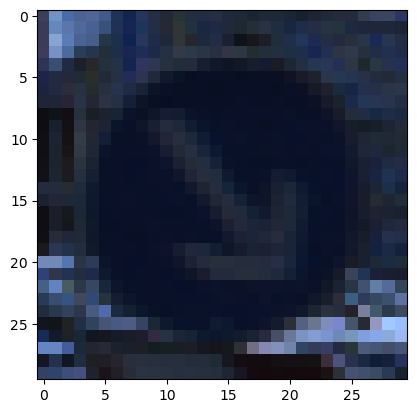

1/1 [==============================] - 0s 34ms/step
[[2.4394559e-34 3.3791530e-29 7.4410872e-34 1.0892716e-32 1.0146525e-36
  1.5272111e-29 7.1556253e-31 0.0000000e+00 3.1507236e-31 2.5842516e-38
  2.3213072e-34 1.6735191e-34 1.8862901e-32 1.5001848e-26 2.3264943e-33
  0.0000000e+00 0.0000000e+00 1.9051587e-38 1.0556616e-32 0.0000000e+00
  3.0740534e-23 2.2641167e-37 4.8783833e-34 3.5961881e-27 0.0000000e+00
  6.4041312e-26 2.5924493e-36 0.0000000e+00 0.0000000e+00 1.2373925e-35
  2.4932508e-34 3.1470989e-29 9.5202829e-32 4.2320110e-36 2.3136792e-18
  9.9812386e-33 7.8924473e-23 0.0000000e+00 1.0000000e+00 1.4834701e-27
  1.8755771e-25 0.0000000e+00 0.0000000e+00]]
1.0
38
(39, 'Keep right')


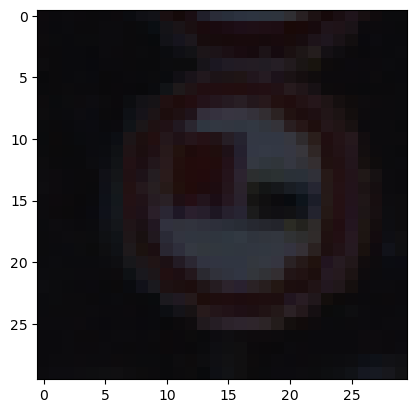

1/1 [==============================] - 0s 32ms/step
[[1.15313792e-37 8.85326603e-22 1.89068790e-21 2.88233619e-23
  8.73730979e-23 4.51892459e-15 2.28565004e-34 1.74101854e-22
  1.68776759e-23 1.14598529e-15 1.00000000e+00 1.07339884e-25
  4.47396921e-22 6.71129627e-25 9.56705731e-26 3.14015653e-21
  5.28889871e-25 2.92142456e-22 1.40853749e-23 2.53829412e-29
  2.13362568e-25 3.76851851e-32 2.33661138e-37 2.67705310e-26
  0.00000000e+00 3.74898873e-25 1.29885221e-25 1.20810537e-36
  0.00000000e+00 1.87338226e-32 1.13744345e-32 3.43665323e-28
  0.00000000e+00 7.62754848e-27 6.00106351e-34 3.10577605e-28
  5.81639189e-32 5.38442128e-30 1.56797916e-29 2.33286520e-34
  4.17186447e-24 2.38771395e-34 3.05855807e-21]]
1.0
10
(11, 'No passing veh over 3.5 tons')


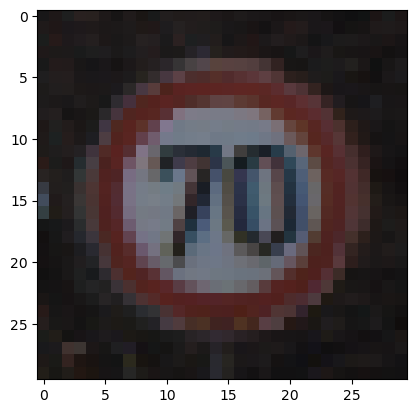

1/1 [==============================] - 0s 40ms/step
[[1.9078778e-24 6.9764057e-18 5.2615938e-24 9.0352920e-36 1.0000000e+00
  6.9765143e-25 0.0000000e+00 3.0816068e-28 3.2971301e-26 0.0000000e+00
  0.0000000e+00 0.0000000e+00 4.0802070e-36 1.0348449e-31 1.3685015e-31
  1.2899429e-20 0.0000000e+00 0.0000000e+00 2.0209631e-32 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 9.0092137e-34 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 2.4534413e-37 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.1952011e-37
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]
1.0
4
(5, 'Speed limit (70km/h)')


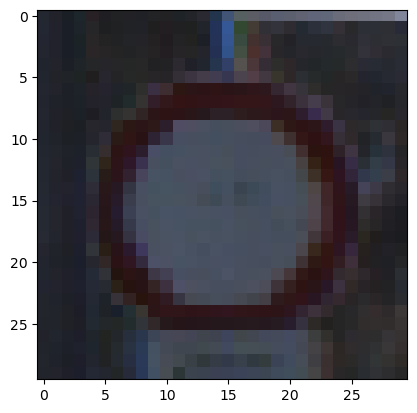

1/1 [==============================] - 0s 42ms/step
[[3.0741236e-11 9.9101226e-06 7.7938072e-05 7.1999312e-07 9.4749957e-05
  8.1975475e-07 2.4915726e-11 2.2485402e-08 3.9315406e-08 1.9547620e-08
  6.2088922e-08 1.7880827e-15 4.5858318e-08 1.2209309e-05 1.4997624e-07
  9.9980325e-01 1.1180339e-08 3.6040012e-12 4.8705921e-11 9.3953682e-15
  2.8996445e-15 3.5966823e-15 9.7558578e-15 1.6071381e-14 2.0557884e-14
  8.3962082e-12 1.7424272e-10 1.2164239e-18 8.1239367e-17 8.4832083e-17
  5.6076816e-16 7.3213640e-15 3.1971350e-09 3.6084039e-08 1.4581758e-10
  3.8720385e-10 8.5550916e-10 8.0346531e-13 6.7084016e-10 6.1057975e-10
  1.9079817e-10 1.9461013e-12 1.4149860e-12]]
0.99980325
15
(16, 'No vehicles')


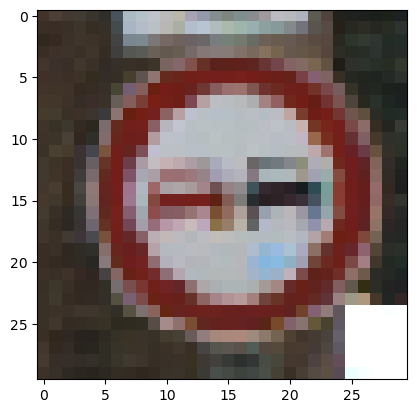

1/1 [==============================] - 0s 63ms/step
[[0.0000000e+00 0.0000000e+00 1.6338261e-38 2.2596930e-27 1.9747374e-37
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  2.1349826e-20 0.0000000e+00 1.4771088e-31 1.0249535e-29 1.0224233e-36
  1.2270467e-20 6.9779492e-18 6.4847592e-35 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.8071620e-32 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 4.8262132e-38 1.6643839e-33 6.5495962e-35
  9.3455388e-27 0.0000000e+00 0.0000000e+00 2.5072963e-37 0.0000000e+00
  1.3094507e-37 1.0741224e-20 4.0018649e-38]]
1.0
9
(10, 'No passing')


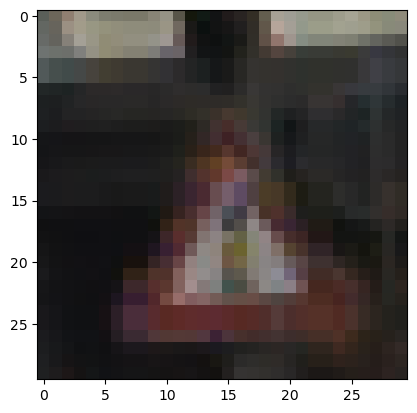

1/1 [==============================] - 0s 39ms/step
[[8.5084148e-13 6.1474346e-11 6.9739292e-12 1.0990370e-13 2.8418528e-09
  1.9128917e-10 6.1600626e-19 2.1536762e-11 2.2109828e-10 6.6975583e-12
  1.1928700e-10 2.8451083e-08 3.5421688e-10 1.2623448e-09 4.2744044e-15
  3.7613870e-11 1.0100153e-13 3.0728043e-13 1.1662559e-04 5.2554206e-08
  1.7902614e-03 1.3304261e-09 1.2025387e-12 2.5531835e-06 2.0265483e-05
  4.1352067e-07 9.9804926e-01 2.0489060e-05 9.5091379e-11 1.4540574e-11
  5.8087546e-10 3.8971386e-09 3.1193966e-13 3.3225735e-11 2.4522634e-11
  3.8735466e-11 8.4647865e-14 2.3669494e-10 7.4344326e-09 6.0767790e-14
  2.9750491e-14 3.8646112e-14 9.0961672e-20]]
0.99804926
26
(27, 'Traffic signals')


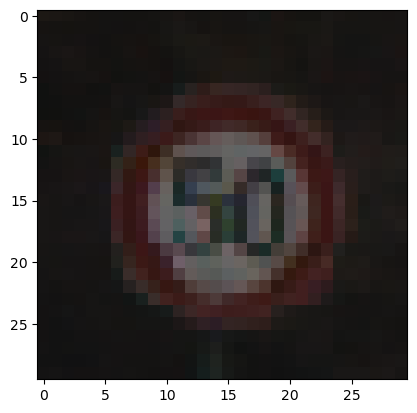

1/1 [==============================] - 0s 37ms/step
[[5.3108680e-35 1.2635639e-15 1.0000000e+00 4.4303075e-21 3.2253061e-23
  2.1385386e-18 0.0000000e+00 2.1513110e-33 8.9126693e-29 2.9685993e-35
  1.6055359e-37 0.0000000e+00 5.0749445e-33 6.9100868e-25 2.3114807e-27
  3.3171984e-28 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 3.7616781e-34 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.5591774e-34 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.2369612e-38
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 4.8450957e-33 0.0000000e+00
  6.4418717e-31 0.0000000e+00 0.0000000e+00]]
1.0
2
(3, 'Speed limit (50km/h)')


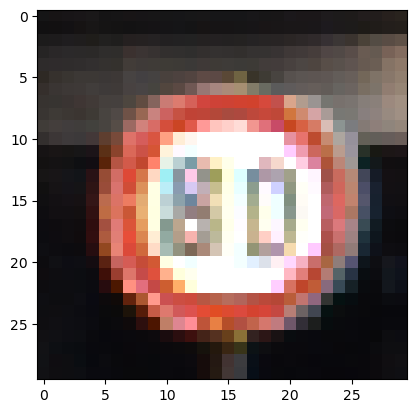

1/1 [==============================] - 0s 77ms/step
[[3.6678421e-28 2.2545634e-14 8.3137117e-12 1.6185896e-09 9.1653583e-23
  1.0000000e+00 6.1393888e-20 4.9880673e-14 4.5661197e-18 3.9455827e-30
  3.3693330e-21 6.6694202e-31 2.8547898e-33 2.1030039e-29 2.9748956e-32
  1.7683496e-35 2.0360626e-22 2.0882085e-35 1.7894070e-34 0.0000000e+00
  3.1497381e-31 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.2879303e-30 1.6279036e-38 0.0000000e+00 1.5270500e-34 1.6617571e-26
  7.4513944e-35 0.0000000e+00 7.5492346e-30 1.5851815e-34 1.3547519e-32
  3.9524787e-32 0.0000000e+00 0.0000000e+00 2.7927679e-33 0.0000000e+00
  1.4628434e-31 4.6088250e-38 1.0447007e-25]]
1.0
5
(6, 'Speed limit (80km/h)')


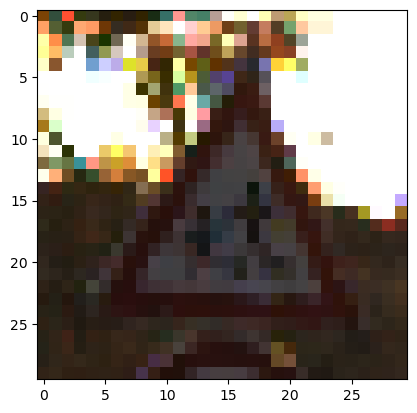

1/1 [==============================] - 0s 53ms/step
[[9.37107614e-10 8.70167882e-10 4.63284716e-10 9.07236245e-06
  4.99637156e-14 1.03772791e-07 9.63392994e-12 1.22783742e-10
  1.23219945e-09 1.64137376e-07 7.19700601e-12 2.90579715e-06
  2.61610000e-09 3.56575462e-08 1.74624440e-10 2.51115773e-12
  5.97801941e-09 6.54642174e-10 3.20500987e-11 7.90294739e-12
  1.14996612e-04 8.81107720e-09 2.94189895e-09 1.15663504e-07
  5.06342246e-10 2.94943465e-08 3.41220524e-10 1.17922050e-09
  9.96755421e-01 2.99918093e-03 1.17904798e-04 3.20115823e-09
  2.48975263e-09 9.10677436e-12 6.84265769e-11 1.07596847e-08
  7.20293877e-12 2.00932613e-16 8.83213835e-10 2.05276404e-11
  1.92153481e-11 8.65779115e-10 5.06301164e-12]]
0.9967554
28
(29, 'Children crossing')


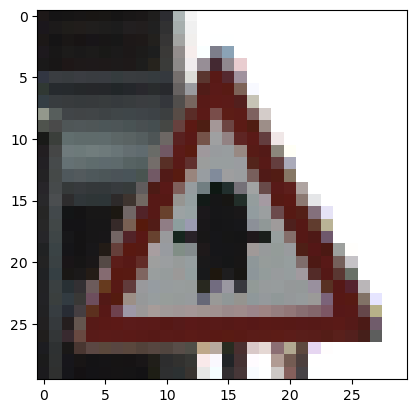

1/1 [==============================] - 0s 33ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 8.1393241e-36 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.1996538e-31 0.0000000e+00 0.0000000e+00
  9.4022569e-26 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]
1.0
11
(12, 'Right-of-way at intersection')


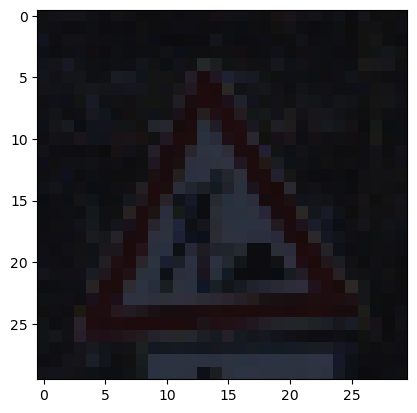

1/1 [==============================] - 0s 41ms/step
[[1.55222504e-23 6.84531066e-17 1.04078579e-19 9.40985672e-20
  2.37971073e-20 1.12354445e-17 4.79936292e-19 2.95083361e-24
  1.11037034e-24 2.12584367e-24 5.29555131e-21 1.24079638e-19
  1.49931397e-20 1.59183067e-17 8.45368828e-20 7.11792098e-23
  2.00374214e-27 2.76354023e-25 1.13673441e-13 5.79108825e-24
  4.24905597e-12 1.82478240e-20 3.69583406e-13 6.68561716e-17
  8.39029079e-15 1.00000000e+00 1.16629932e-14 3.84678767e-19
  2.22037490e-15 2.42739182e-16 1.35937480e-17 5.80307513e-16
  1.07384219e-23 1.48836837e-26 2.32668970e-18 2.61847093e-20
  1.77286012e-14 4.64546135e-26 3.39812762e-15 1.10283222e-22
  1.30655616e-23 1.18069694e-27 2.67513851e-30]]
1.0
25
(26, 'Road work')


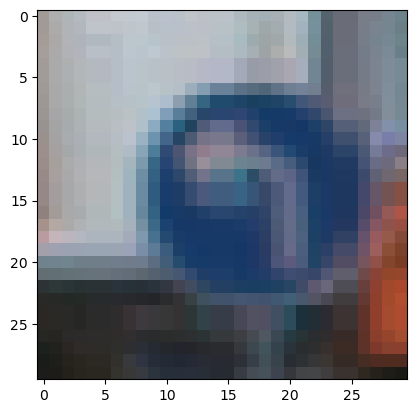

1/1 [==============================] - 0s 36ms/step
[[7.92477339e-26 4.88193532e-20 1.65780514e-19 1.15348299e-18
  1.57288227e-25 4.74239809e-19 1.05227774e-21 3.93052589e-24
  4.10182193e-20 3.79352556e-18 7.78000201e-20 1.05035704e-13
  4.09849663e-17 3.80179952e-17 2.38961031e-25 2.34343943e-22
  2.51306113e-21 1.49773851e-24 2.84276975e-18 6.10295411e-22
  3.59832010e-16 1.69918793e-16 6.18968388e-21 5.97031107e-17
  8.83798541e-20 2.10723980e-17 2.62757942e-17 4.82049145e-22
  5.21792201e-15 6.67427816e-16 2.23218538e-13 7.82648152e-24
  1.25695678e-17 1.84510461e-17 9.99999642e-01 3.38512166e-07
  1.77665944e-12 1.26660416e-22 3.54400398e-10 8.79523374e-21
  3.51909566e-17 6.03232505e-18 1.19234602e-21]]
0.99999964
34
(35, 'Turn left ahead')


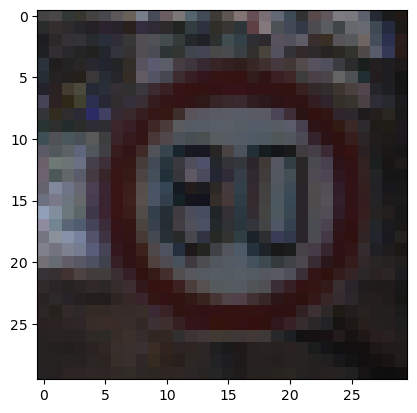

1/1 [==============================] - 0s 38ms/step
[[5.6974368e-31 6.6436750e-15 3.3513272e-11 4.5259681e-13 1.2096041e-21
  1.0000000e+00 8.3768057e-20 4.4141068e-16 3.5845145e-22 6.8827593e-38
  2.6781527e-21 5.6880063e-33 8.7197219e-32 6.7670021e-33 3.8919531e-27
  1.7891708e-31 3.8741002e-29 1.6900582e-34 2.5677259e-36 0.0000000e+00
  9.1725281e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  4.0415634e-33 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.8144878e-37
  0.0000000e+00 3.9421368e-38 3.9769583e-35 9.6769531e-33 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 8.0632475e-34 0.0000000e+00
  6.2879494e-29 0.0000000e+00 3.4016831e-29]]
1.0
5
(6, 'Speed limit (80km/h)')


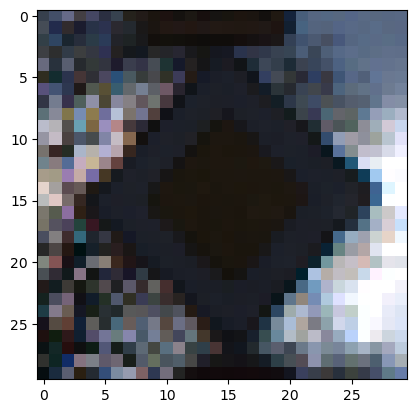

1/1 [==============================] - 0s 56ms/step
[[8.6890781e-12 4.8076657e-07 3.6978898e-07 2.9860544e-06 4.8765476e-09
  4.0460495e-06 1.8523580e-10 6.8805932e-08 1.5566714e-07 1.5168192e-09
  3.6508676e-09 1.1037423e-05 9.9996746e-01 5.6820380e-08 5.8779015e-08
  1.0313613e-08 2.7869418e-10 8.2262630e-08 2.4162392e-10 1.0966195e-10
  4.3182680e-11 1.1416163e-06 4.0058746e-15 3.6822084e-11 1.3323246e-13
  6.5317244e-07 1.6223720e-10 2.8774042e-11 1.4923108e-11 8.9295249e-08
  1.2000447e-09 3.7798862e-09 1.1034244e-09 1.7776964e-09 2.7635951e-12
  3.8410147e-07 2.7599035e-15 2.6076992e-13 4.8847486e-09 2.1292282e-12
  1.0845824e-05 2.0783326e-14 4.5655125e-13]]
0.99996746
12
(13, 'Priority road')


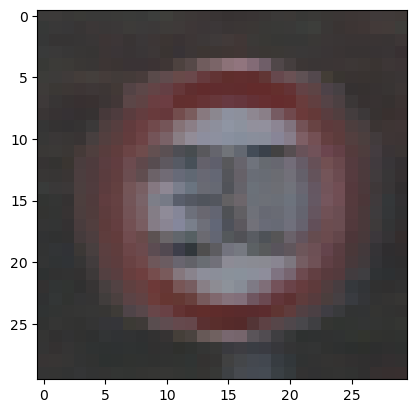

1/1 [==============================] - 0s 52ms/step
[[2.1142770e-18 1.0000000e+00 3.7640583e-13 3.2513879e-28 1.7366384e-17
  1.7325551e-14 1.6469360e-30 4.7304856e-22 1.3855256e-24 0.0000000e+00
  0.0000000e+00 2.9208784e-37 4.3071671e-32 1.1074530e-29 1.1423656e-25
  2.2536069e-27 1.1971501e-36 9.2979629e-34 8.5684473e-30 0.0000000e+00
  3.9542671e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  4.8158555e-32 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 3.7220906e-37 0.0000000e+00
  0.0000000e+00 0.0000000e+00 3.6661505e-35 1.9125734e-36 0.0000000e+00
  1.1942826e-26 0.0000000e+00 0.0000000e+00]]
1.0
1
(2, 'Speed limit (30km/h)')


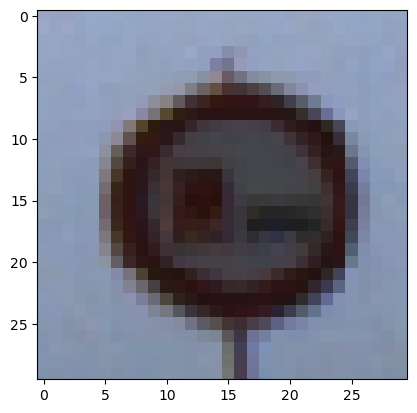

1/1 [==============================] - 0s 31ms/step
[[0.0000000e+00 2.7224855e-22 5.5809561e-23 7.8169227e-20 1.6407135e-25
  2.4071736e-13 1.7392541e-28 9.2534054e-21 5.7603057e-25 5.9035483e-17
  1.0000000e+00 4.3698850e-27 3.2947396e-27 8.8793875e-27 4.7260083e-31
  6.8482608e-25 9.3295504e-26 7.2962321e-30 2.1596550e-27 5.6277169e-36
  1.9866403e-27 6.3715708e-35 0.0000000e+00 1.8281871e-30 0.0000000e+00
  1.9722009e-29 4.9607129e-33 0.0000000e+00 0.0000000e+00 7.4823280e-35
  2.5681987e-34 4.2844356e-33 0.0000000e+00 1.5482309e-26 2.1649886e-30
  3.2845957e-22 4.6582952e-32 2.7341487e-32 1.1571829e-30 4.4809914e-36
  6.6673222e-27 2.6686302e-34 1.6844491e-15]]
1.0
10
(11, 'No passing veh over 3.5 tons')


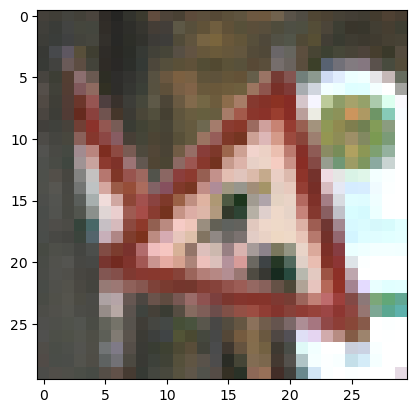

1/1 [==============================] - 0s 51ms/step
[[9.15499796e-34 7.19988539e-20 5.44693112e-24 2.85618369e-26
  2.39061158e-27 1.98246536e-23 9.76367596e-27 1.26318900e-36
  0.00000000e+00 0.00000000e+00 1.07920207e-29 1.64171174e-29
  2.00617765e-31 2.31027951e-29 1.86316188e-25 2.24129726e-33
  0.00000000e+00 7.91210163e-38 1.11941697e-23 2.25804450e-37
  3.71820235e-22 8.73397063e-32 1.44447729e-24 3.52126235e-30
  8.85621311e-20 1.00000000e+00 1.23609604e-26 1.86994914e-31
  1.30967724e-27 4.00631677e-27 1.65772956e-27 3.84985283e-28
  1.69671733e-35 0.00000000e+00 3.50125111e-30 1.33547943e-32
  1.77626708e-27 1.20949672e-38 9.85530050e-23 0.00000000e+00
  1.15918010e-37 0.00000000e+00 0.00000000e+00]]
1.0
25
(26, 'Road work')


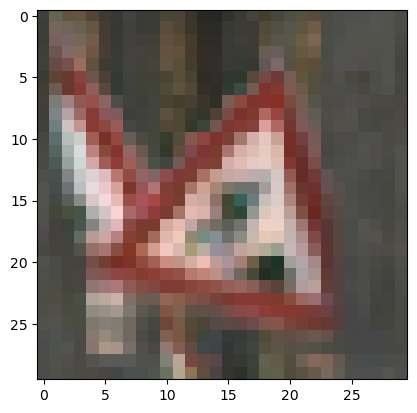

1/1 [==============================] - 0s 57ms/step
[[1.66161934e-24 6.48459890e-16 7.69259565e-19 9.41912244e-20
  6.47007180e-23 4.47633884e-16 1.43070529e-19 1.66219448e-26
  2.07466906e-29 1.40480779e-31 1.42420467e-25 1.38015735e-14
  8.28504510e-23 3.54888271e-21 2.90589290e-25 1.45868455e-26
  2.77291049e-30 3.40588674e-31 1.59250190e-13 2.78393732e-27
  6.11189539e-13 1.39122116e-21 7.86828244e-22 7.88965595e-21
  2.66045883e-11 1.00000000e+00 5.73800871e-15 1.43843748e-12
  1.74986114e-14 4.24357406e-19 2.28169844e-16 3.00898225e-20
  3.69781945e-22 2.70898874e-28 1.04798680e-23 9.73290981e-22
  4.80718234e-21 4.78894612e-31 7.79283220e-21 1.82393385e-27
  1.29630666e-27 6.26635071e-29 3.18081461e-33]]
1.0
25
(26, 'Road work')


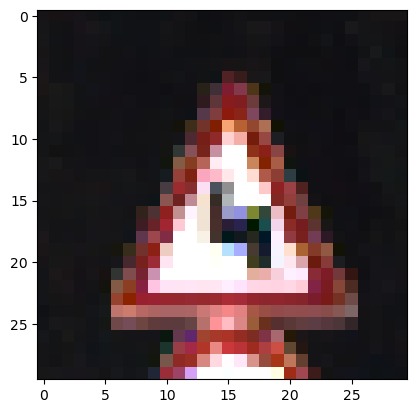

1/1 [==============================] - 0s 26ms/step
[[0.0000000e+00 4.2477925e-38 4.8480071e-37 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 3.2899770e-21 2.9886070e-36 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 8.0678437e-31
  0.0000000e+00 1.0000000e+00 0.0000000e+00 5.0555615e-34 7.0706828e-27
  6.0379521e-23 3.2435934e-37 8.7492160e-38 0.0000000e+00 2.4091309e-35
  3.5456476e-29 5.1095166e-20 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]
1.0
21
(22, 'Double curve')


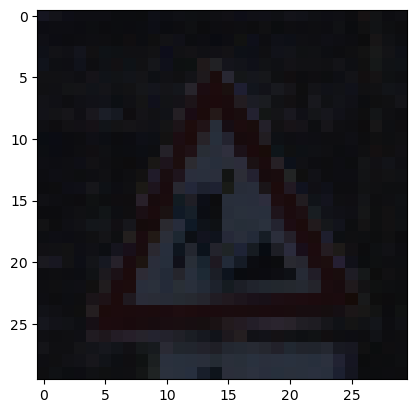

1/1 [==============================] - 0s 33ms/step
[[6.3198282e-24 2.7677399e-17 1.2999764e-19 1.9692273e-18 5.0172285e-21
  2.4536803e-18 1.0801595e-18 8.7859640e-25 6.1110313e-25 1.7551346e-23
  1.7489149e-20 1.7908837e-17 2.2788420e-19 1.6991627e-16 3.8754797e-19
  8.0657577e-22 2.9271829e-28 1.1682081e-24 2.2875661e-14 3.0880854e-24
  5.7592941e-14 1.1993826e-18 9.4534013e-14 3.7090620e-16 6.1153526e-15
  1.0000000e+00 6.1974039e-16 2.2239562e-19 1.8562253e-16 6.9960808e-16
  3.8798641e-16 9.3124285e-15 1.1483219e-23 4.1700143e-26 3.8228425e-18
  1.8675510e-19 6.1306750e-15 7.6188541e-27 2.0579585e-14 7.2544343e-23
  3.7400508e-23 3.9309992e-28 5.3357979e-30]]
1.0
25
(26, 'Road work')


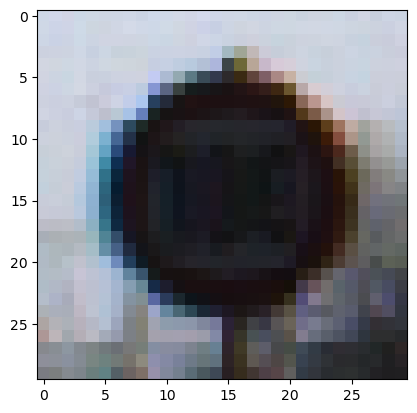

1/1 [==============================] - 0s 44ms/step
[[1.97322816e-08 2.29136771e-04 4.01396574e-06 9.63432612e-05
  7.84243282e-04 1.81693956e-01 7.02223915e-04 7.91794837e-01
  2.46709678e-02 1.53105750e-09 1.22725999e-06 9.59189533e-11
  1.29204864e-06 3.32089414e-08 1.16913466e-08 4.04487309e-06
  2.92815594e-06 2.30783753e-10 6.35426600e-10 2.05989519e-15
  1.16236964e-10 9.19108878e-14 1.35095868e-15 4.71457386e-14
  4.29057043e-15 6.82243498e-11 1.11099983e-10 7.27853982e-16
  8.56716770e-14 2.28242009e-11 1.03241114e-12 2.99916450e-12
  1.63121354e-06 1.10191003e-07 2.02401568e-10 5.71207481e-09
  8.96027974e-11 1.53037115e-13 4.05010638e-08 6.11792561e-11
  5.65318123e-06 1.55355971e-11 7.25656491e-06]]
0.79179484
7
(8, 'Speed limit (100km/h)')


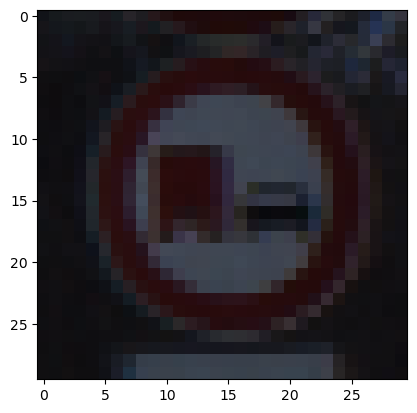

1/1 [==============================] - 0s 55ms/step
[[2.0323767e-37 1.6103395e-21 1.6270601e-22 2.7167794e-22 1.9510304e-23
  2.9926432e-15 8.3001998e-30 6.5929814e-22 5.9633435e-26 4.6731208e-17
  1.0000000e+00 4.9207180e-26 1.5331391e-25 2.1044870e-23 1.0031191e-27
  5.4113768e-22 3.8522014e-29 2.6502901e-25 1.6198885e-22 4.7683678e-30
  1.4114036e-24 1.5344909e-32 2.9086033e-37 1.8305218e-26 1.4377773e-37
  6.3058065e-26 1.5758316e-25 4.0944094e-37 1.7403006e-38 1.4841900e-33
  4.4835996e-32 2.0858364e-27 0.0000000e+00 7.0959471e-27 8.3951851e-31
  4.3388425e-26 5.7044209e-30 5.3890884e-29 5.4096878e-28 4.5029639e-34
  4.2472532e-25 7.1711937e-33 1.1627476e-18]]
1.0
10
(11, 'No passing veh over 3.5 tons')


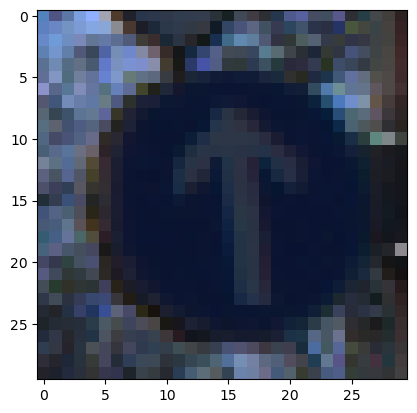

1/1 [==============================] - 0s 52ms/step
[[1.58623887e-28 7.38888523e-23 1.59409156e-24 8.75022187e-22
  8.99081352e-26 1.51125539e-23 4.05448126e-29 2.45731159e-28
  3.45233773e-23 2.24141596e-19 1.27118435e-21 2.23635872e-20
  1.16033839e-16 1.49432014e-17 1.21973594e-24 1.04063095e-19
  7.42981946e-21 6.32866122e-23 3.14780240e-17 2.03181542e-25
  4.95512388e-22 1.85977162e-21 6.12879411e-26 6.47022011e-23
  1.59464054e-22 2.36649042e-23 9.02197705e-18 4.67152037e-23
  7.44411054e-23 2.14824773e-22 1.31345735e-23 3.52547670e-26
  1.07354124e-19 5.21085779e-13 1.19448368e-10 1.00000000e+00
  5.10048303e-19 3.27722008e-13 4.95047241e-16 4.21138958e-17
  4.16552036e-16 2.39435835e-23 4.18652920e-25]]
1.0
35
(36, 'Ahead only')


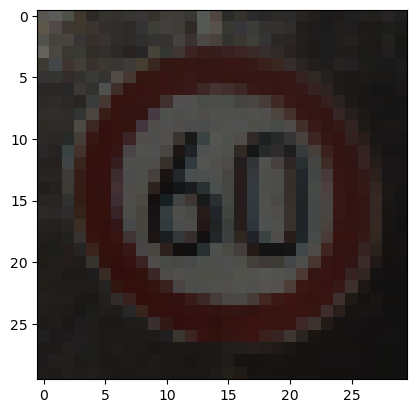

1/1 [==============================] - 0s 32ms/step
[[1.72344537e-25 8.12123120e-16 7.49412834e-08 9.99999881e-01
  1.16300126e-24 3.74714801e-08 1.78207016e-19 4.21871703e-19
  2.13504953e-18 4.75027740e-18 1.09966731e-17 3.23218336e-20
  7.37455911e-21 4.16835879e-19 7.81730158e-22 1.65454399e-21
  2.54031092e-20 2.16635495e-27 2.01671366e-30 1.28787802e-27
  5.62060067e-26 3.14886896e-26 5.71907499e-33 1.61267821e-25
  9.09416326e-32 1.62301268e-21 1.94705624e-34 4.89296262e-32
  2.33698327e-24 1.50123901e-17 1.23875489e-24 4.59894164e-21
  2.42969108e-22 3.35433597e-24 1.14506726e-23 3.93010053e-20
  2.51916668e-28 6.67365250e-36 9.42622391e-23 8.84815022e-33
  6.95652691e-18 2.00295679e-25 2.32094806e-23]]
0.9999999
3
(4, 'Speed limit (60km/h)')


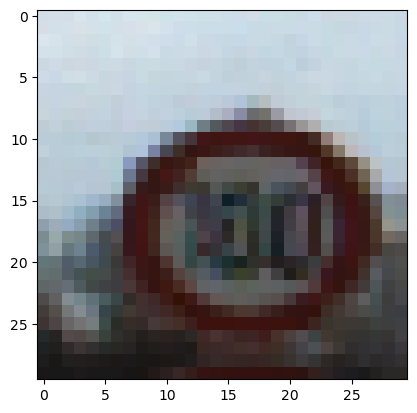

1/1 [==============================] - 0s 51ms/step
[[2.6013431e-11 1.7831680e-06 6.5699072e-07 5.2415336e-11 4.7213193e-06
  1.5469432e-04 1.5593370e-16 9.9229527e-01 7.5428239e-03 2.4163730e-13
  1.0003209e-10 9.9228712e-17 1.7181623e-12 3.6237479e-13 5.2849235e-14
  1.1323878e-11 9.4564072e-11 1.7105465e-16 1.1967567e-18 6.9712648e-23
  6.6655205e-14 1.2095058e-19 1.8954742e-26 3.0712017e-21 4.3059044e-19
  1.5424818e-16 3.0394940e-17 2.9626815e-24 4.3694625e-18 1.1067616e-15
  4.7345222e-13 3.3409941e-18 1.0098141e-17 5.5408716e-12 2.4031424e-19
  4.5749341e-17 6.5451797e-22 5.2049029e-18 7.5009843e-17 8.6212636e-19
  2.2346511e-10 5.0557117e-24 5.1195052e-16]]
0.99229527
7
(8, 'Speed limit (100km/h)')


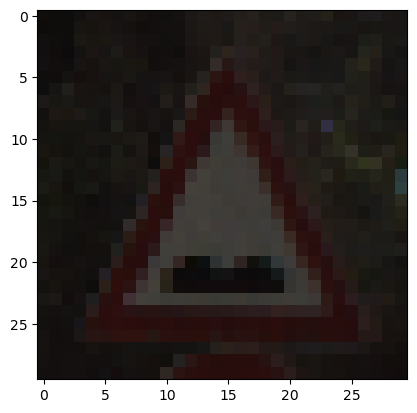

1/1 [==============================] - 0s 49ms/step
[[4.65861585e-11 5.06146625e-10 3.34349826e-10 1.28991151e-10
  4.46430670e-11 2.02707170e-10 3.23645148e-15 2.18723791e-15
  1.29411985e-11 1.18158277e-13 1.51698197e-14 2.88375886e-11
  4.27506430e-09 4.62347991e-08 6.24654319e-08 1.79007404e-08
  1.87727764e-15 6.43990805e-10 3.24200869e-06 1.92335592e-10
  1.82931274e-07 8.83777274e-10 9.99981880e-01 1.80057302e-08
  2.71514211e-09 1.16687715e-06 1.05123963e-05 6.67250882e-15
  2.17068390e-08 1.53559620e-06 9.22914134e-10 1.22154904e-06
  3.06094429e-12 4.41878895e-11 5.78553455e-11 2.61167199e-11
  4.53831500e-10 5.78942208e-14 2.53232759e-08 3.66979371e-08
  1.65240321e-11 2.28776551e-17 7.64115458e-20]]
0.9999819
22
(23, 'Bumpy road')


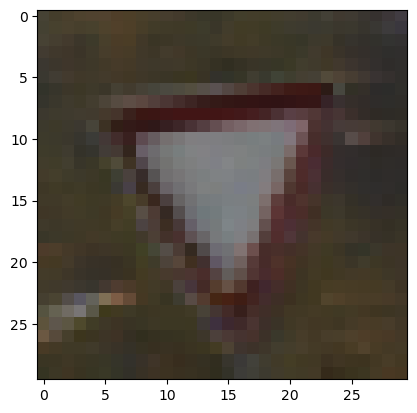

1/1 [==============================] - 0s 39ms/step
[[2.81620062e-23 2.65439119e-15 3.86898257e-14 1.99283731e-16
  3.23783151e-15 3.95461197e-21 1.85939320e-31 3.91051919e-23
  6.41084814e-20 6.54301387e-17 3.68511402e-24 7.24722082e-29
  1.48713632e-19 1.00000000e+00 2.09822394e-14 5.95907906e-11
  1.31936093e-26 3.92248804e-22 2.14576509e-23 3.45392354e-35
  2.21576465e-29 1.22065906e-29 2.67262742e-24 4.61521667e-28
  5.10209823e-34 9.14175373e-23 1.11960113e-22 3.99896951e-36
  1.21906231e-30 6.75374574e-26 2.68391403e-26 1.41073935e-27
  1.27334703e-24 7.94985937e-23 9.37642505e-20 4.82685489e-24
  1.40639309e-26 9.66453614e-30 1.78912797e-18 1.45770986e-20
  3.51081930e-27 1.64546274e-27 1.40265368e-33]]
1.0
13
(14, 'Yield')


In [58]:
from tensorflow.keras.preprocessing import image

dir_path = 'C:\\AI(ml&dl)\\DATASETS\\Taffic_signals_rec\\code\\Pedict_set'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'\\'+i,target_size = (30,30))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis = 0)
    
    images = np.vstack([x])
    result = model.predict(images)
    print(result)
    
    fresult = np.max(result)
    print(fresult)
    labelR = label[result.argmax()]
    print(result.argmax())
    print(labelR)